# <Center> PREDICTING THE NEXT DAY PRICE OF BITCOIN USING MACHINE LEARNING TECHNIQUES </center>
## <center> EXPLORATORY DATA ANALYSIS </center>
### <center> 2148040, 2148041</center>

## Import data & libraries

In [1]:
#Data analysis, manipulation
import pandas as pd
import numpy as np

#Using it to genereate random colors for visuals
import random

#To visualize missing values 
import missingno as msno

#Visuals
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import matplotlib.cm as cm
import matplotlib.lines as mlines

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

#manipulate the data and visualize
from scipy.stats import describe
from scipy.stats import pearsonr
import scipy.stats as st

In [2]:
final_df = pd.read_csv('cleandata.csv')
final_df

,Unnamed: 0,Date,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,...,avg_transaction_value,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward,number_of_coins_in_circulation,miner_revenue,next_day_closing_price
0,0,2013-01-01,13.5,13.6,13.2,13.3,31734,89033,26174,2979637,...,625.432,14.518,8193.0,1.194,37846.0,19.536,0.627,10621175.00,5.264860e+04,13.3
1,1,2013-01-02,13.3,13.4,13.2,13.3,39280,114077,31809,2979637,...,650.617,14.514,8193.0,1.497,43104.0,19.597,0.835,10621575.00,5.486525e+04,13.4
2,2,2013-01-03,13.3,13.5,13.3,13.4,42147,108023,38197,2979637,...,542.730,19.732,8193.0,1.798,51268.0,19.621,0.925,10628700.00,4.811833e+04,13.5
3,3,2013-01-04,13.4,13.5,13.3,13.5,48436,141811,34990,2979637,...,632.431,11.384,8193.0,1.841,47341.0,19.540,1.000,10632425.00,5.087274e+04,13.4
4,4,2013-01-05,13.5,13.6,13.3,13.4,39455,118240,38008,2979637,...,697.556,13.945,8193.0,1.826,53417.0,19.543,0.885,10633200.00,5.139673e+04,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3372,3372,2022-03-27,44542.0,46947.0,44445.0,46859.0,218071,595651,421737,27452707696467,...,678394.000,505.231,202928.0,72.196,696507.0,15.548,0.905,18995681.25,3.761548e+07,47105.0
3373,3373,2022-03-28,46859.0,48199.0,46672.0,47105.0,293145,683575,520476,27452707696467,...,764524.000,649.352,239616.0,96.113,916092.0,15.531,1.077,18996587.50,4.754287e+07,47449.0
3374,3374,2022-03-29,47126.0,48127.0,47029.0,47449.0,286789,656320,519299,27452707696467,...,737579.000,609.259,234380.0,84.155,828096.0,15.464,1.045,18997462.50,4.533058e+07,47075.0
3375,3375,2022-03-30,47449.0,47714.0,46601.0,47075.0,272729,727827,485753,27452707696467,...,637283.000,590.518,200360.0,79.054,769223.0,15.466,1.308,18998493.75,4.037914e+07,45525.0


The `clean data` is being imported for EDA which has no missing value and is pre-processed for the further study.

In [3]:
del final_df['Unnamed: 0']

In [4]:
final_df.head()

,Date,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,avg_hashrate,...,avg_transaction_value,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward,number_of_coins_in_circulation,miner_revenue,next_day_closing_price
0,2013-01-01,13.5,13.6,13.2,13.3,31734,89033,26174,2979637,2.433154e+13,...,625.432,14.518,8193.0,1.194,37846.0,19.536,0.627,10621175.0,52648.600000,13.3
1,2013-01-02,13.3,13.4,13.2,13.3,39280,114077,31809,2979637,2.280465e+13,...,650.617,14.514,8193.0,1.497,43104.0,19.597,0.835,10621575.0,54865.251543,13.4
2,2013-01-03,13.3,13.5,13.3,13.4,42147,108023,38197,2979637,2.372489e+13,...,542.730,19.732,8193.0,1.798,51268.0,19.621,0.925,10628700.0,48118.330620,13.5
3,2013-01-04,13.4,13.5,13.3,13.5,48436,141811,34990,2979637,2.260818e+13,...,632.431,11.384,8193.0,1.841,47341.0,19.540,1.000,10632425.0,50872.740000,13.4
4,2013-01-05,13.5,13.6,13.3,13.4,39455,118240,38008,2979637,2.259070e+13,...,697.556,13.945,8193.0,1.826,53417.0,19.543,0.885,10633200.0,51396.725494,13.4


### Shape of the data 

In [5]:
final_df.shape

(3377, 25)

### Data set info

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            3377 non-null   object 
 1   opening_price                   3377 non-null   float64
 2   highest_price                   3377 non-null   float64
 3   lowest_price                    3377 non-null   float64
 4   closing_price                   3377 non-null   float64
 5   transactions_in_blockchain      3377 non-null   int64  
 6   avg_block_size                  3377 non-null   int64  
 7   sent_by_adress                  3377 non-null   int64  
 8   avg_mining_difficulty           3377 non-null   int64  
 9   avg_hashrate                    3377 non-null   float64
 10  mining_profitability            3377 non-null   float64
 11  sent_coins_in_usd               3377 non-null   int64  
 12  avg_transaction_fees            33

### Missing values

In [37]:
final_df.isnull().sum()

Date                              0
opening_price                     0
highest_price                     0
lowest_price                      0
closing_price                     0
transactions_in_blockchain        0
avg_block_size                    0
sent_by_adress                    0
avg_mining_difficulty             0
avg_hashrate                      0
mining_profitability              0
sent_coins_in_usd                 0
avg_transaction_fees              0
median_transaction_fees           0
avg_block_time                    0
avg_transaction_value             0
median_transaction_value          0
tweets                            0
google_trends                     0
active_addresses                  0
top100_to_total_percentage        0
avg_fee_to_reward                 0
number_of_coins_in_circulation    0
miner_revenue                     0
next_day_closing_price            0
dtype: int64

## Univariate Analysis
We have defined a function `plot_data` to plot the trend of the data, distribution of the data and correlation.   

This following function uses the following parameters:  
1. df- data frame
2. feature_name - the variable to be displayed
3. excluding feature

In [6]:
def plot_data(df,feature_name,exclude_feature='next_day_closing_price'):
    df.plot(x='Date',y=feature_name,figsize=(25,5),grid=True,color='Purple')
    plt.title(f'Date VS {feature_name.replace("_"," ")}')
    plt.ylabel(feature_name)
    plt.show()

    df.plot(kind='kde',y=feature_name,figsize=(25,5),grid=True,color='Red')
    plt.title(f'KDE-{feature_name.replace("_"," ")}')
    plt.show()

    corr = df.corr().loc[[feature_name],:].sort_values(by=feature_name,axis=1).drop(columns=[feature_name,exclude_feature])
    plt.figure(figsize = (25,5))
    sns.heatmap(corr,cmap='tab10',square=True,annot=True,cbar=False,annot_kws={"fontsize":16},linewidths=1, linecolor='black',)
    plt.title(f'Correlation with other features')
    plt.show()    

### 01. Next Day Closing Price

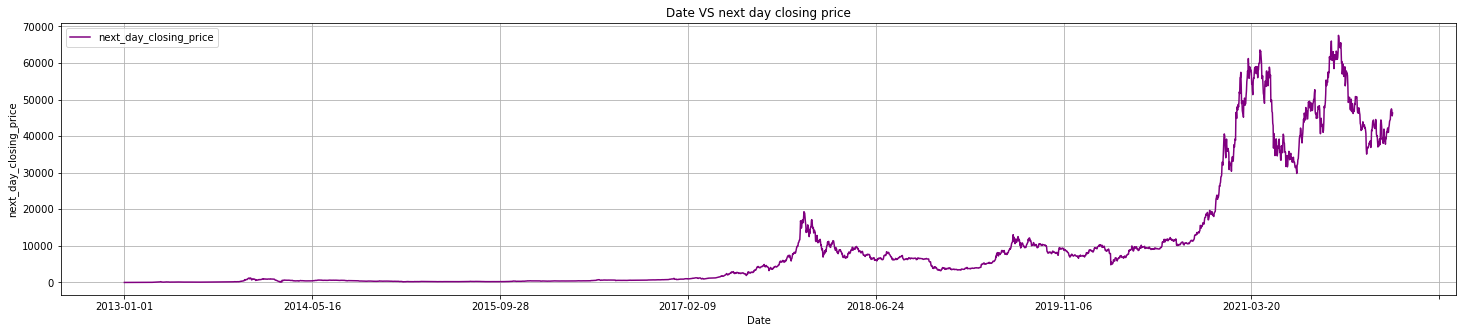

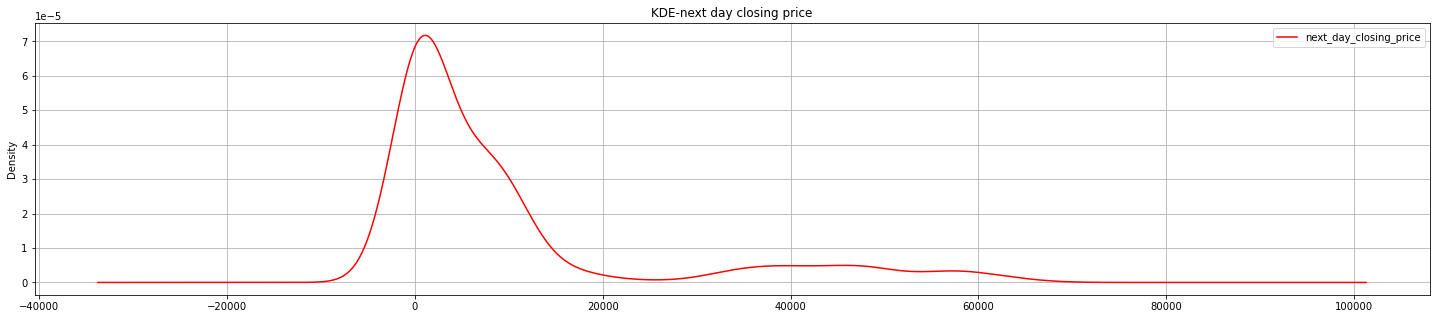

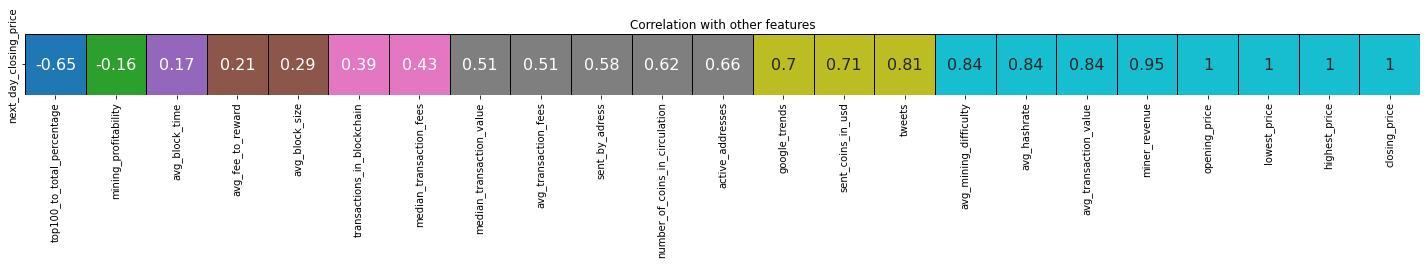

In [7]:
plot_data(final_df,feature_name='next_day_closing_price')

**Observations**

1.   The KDE plot shows that the distribution is right skewed, and it is also observed that a huge chunk of prices belongs to 0 to 2500 USD between 2013 to 2022.

2.  The prices are volatile. They were stable from 2013 to 2017. Then there is a vast increase. The prices were stable for some time. After 2020 the prices have increased heavily but yet again they saw some decrease.

3. Miner revenue, which includes both transaction fees and rewards, is well correlated with price.

4. Other features with which prices show good correlation are miner revenue, avg_transaction_value,sent_coins_in_usd, avg_mining_difficulty, avg_hashrate. 

5.  Twitter and google trends show the effect of social media. We can interpret it as more people searched or discussed about it, more people invested, which made a positive correlation.




### 02.Number of transactions in blockchain per day
* Bitcoin transactions are messages which are digitally signed using cryptography and sent to the entire Bitcoin Network for verification. 
* New Blocks are added to the blockchain every 10 minutes. 
* Transactions are public and can be found on the digital ledger known as the blockchain.
* The number of daily confirmed transactions highlights the value of the Bitcoin network to securely transfer funds without a third party. i.e. more the transactions, more valuable is the bitcoin network

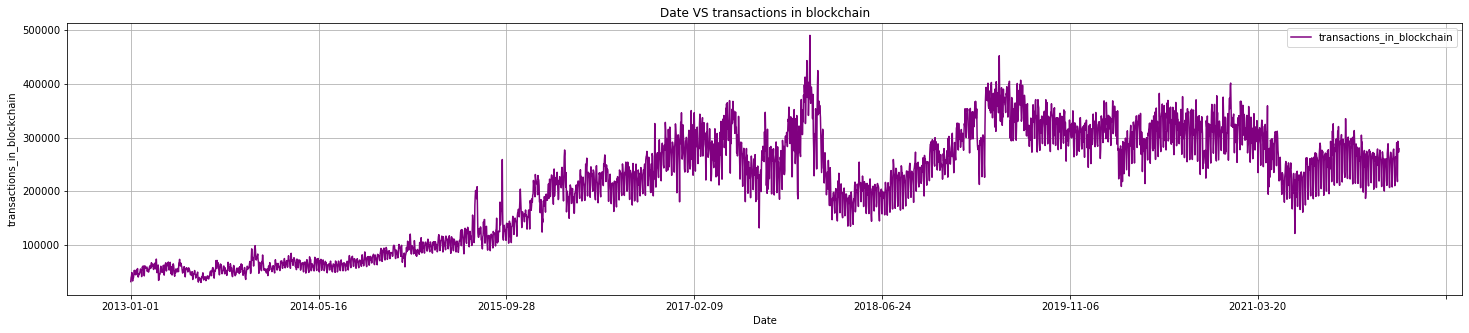

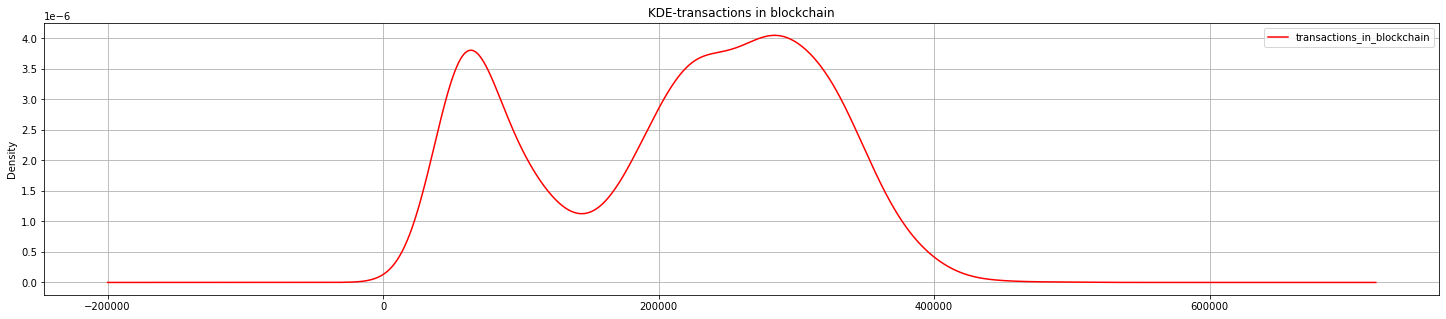

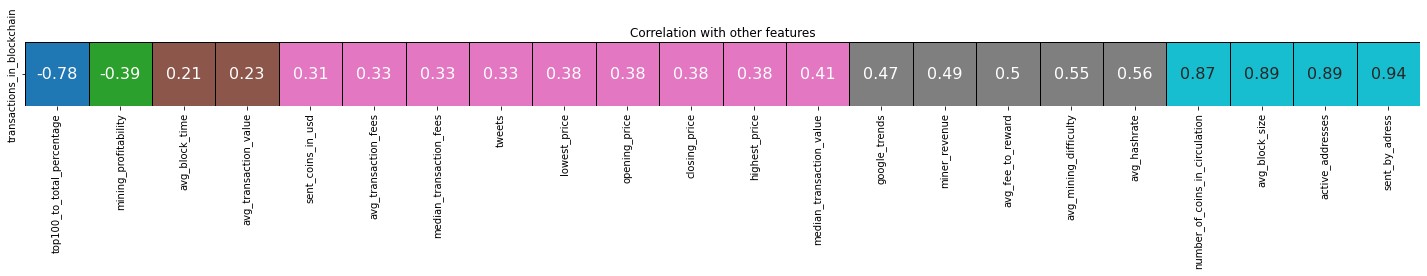

In [8]:
plot_data(final_df,feature_name='transactions_in_blockchain')

**Observations**


1.   As bitcoins started gaining popularity, there has been a vast increase in the number of payment transactions. ,
2.  As the transactions increases more blocks will be added to the network, thus increasing its size, which is visible from correlation with block size. Number of sent by address is highly correlated as the transactions are calculated by sent and received payments.
3. It has a less correlation with price of same day which implies higher number of transactions does not increase the price.


### 03.Average block size(Kb)
* Blocks are files where transactional information related to the Bitcoin network is permanently recorded, i.e. once written, it cannot be altered or removed.

* It records the most recent Bitcoin transactions that have not yet entered in any prior blocks. Thus, a block is like a page of a ledger. Each time a block is ‘completed’, it gives way to the next block in the blockchain. 

* The maximum block size is currently set at 1 megabyte

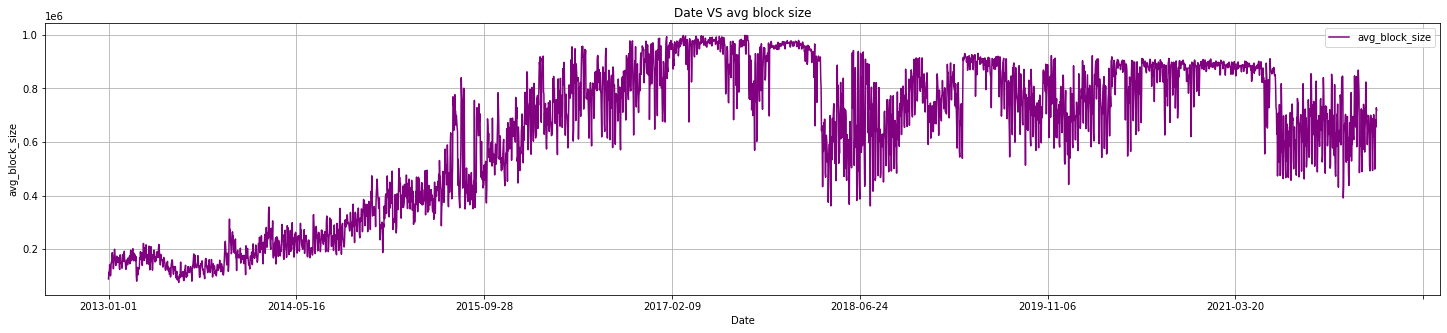

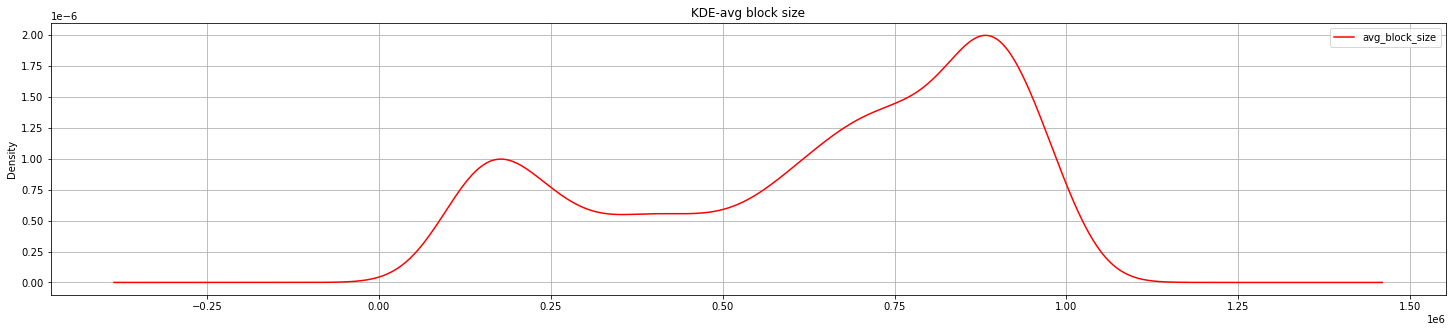

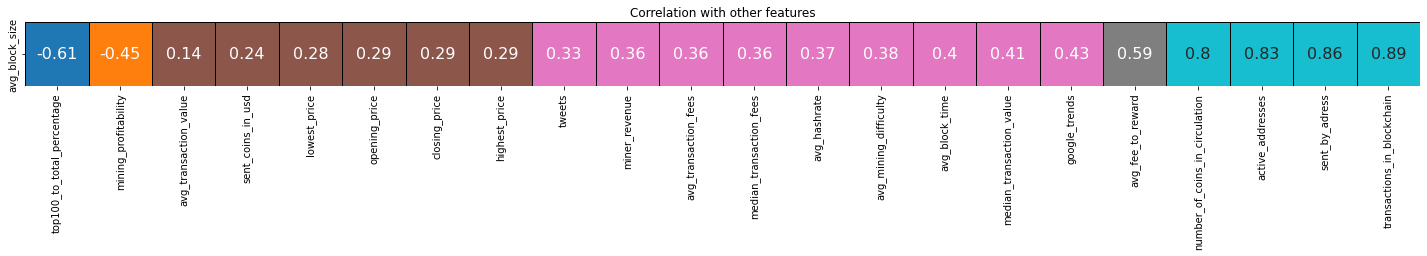

In [9]:
plot_data(final_df,feature_name='avg_block_size')

**Observations**

1.   Block size follows similar trends to the number of transactions. Which is also visible from its correlation with the number of transactions.

2. The increase over time can be linked with gain in popularity of bitcoin

### 04 & 05.Number of sent by adresses(From) and number of active adress(From and To)
* Sent from addresses are distinct Bitcoin addresses from which payments are made everyday

* active address is the number of unique addresses taking part in a transaction by either sending or receiving Bitcoins

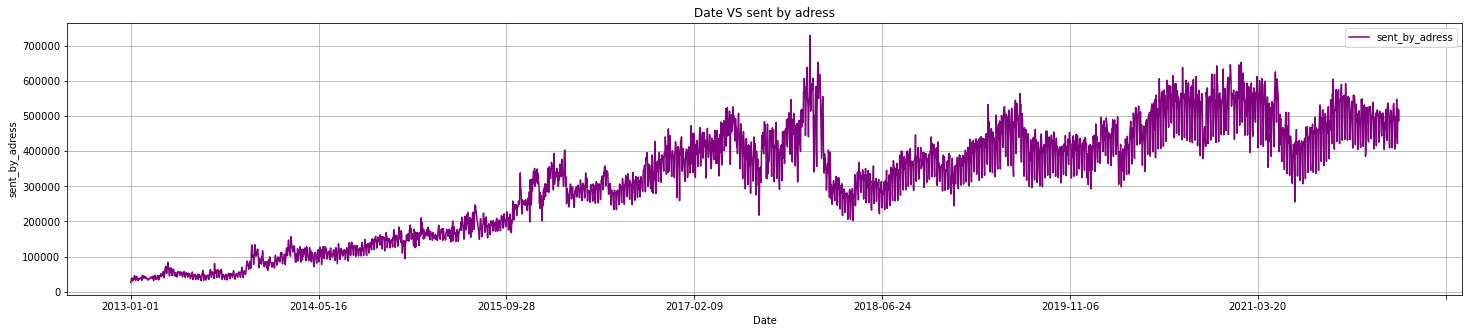

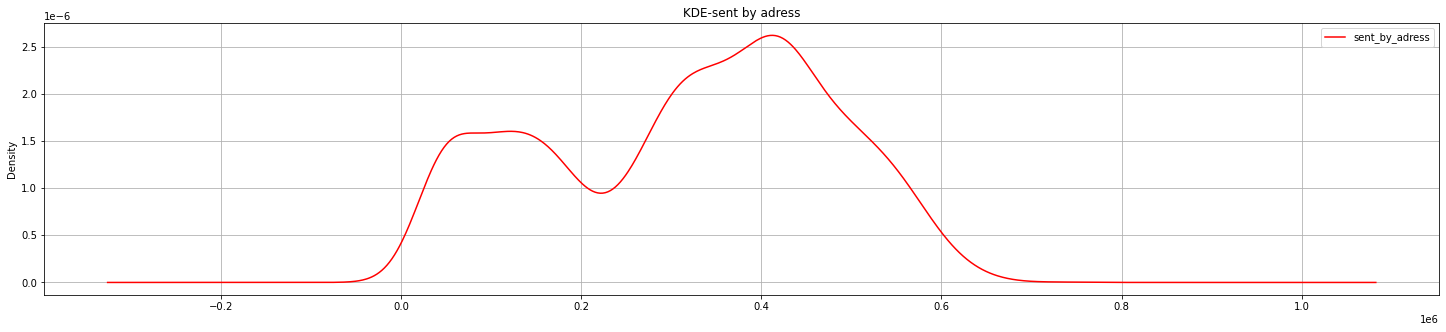

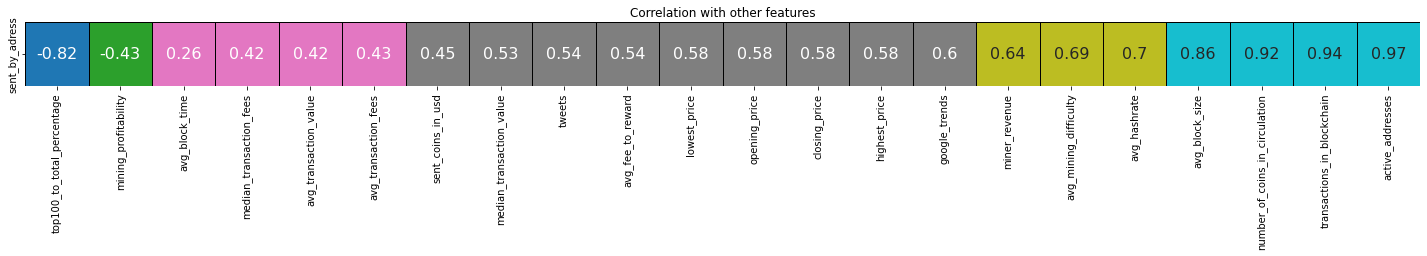

In [10]:
plot_data(final_df,feature_name='sent_by_adress')

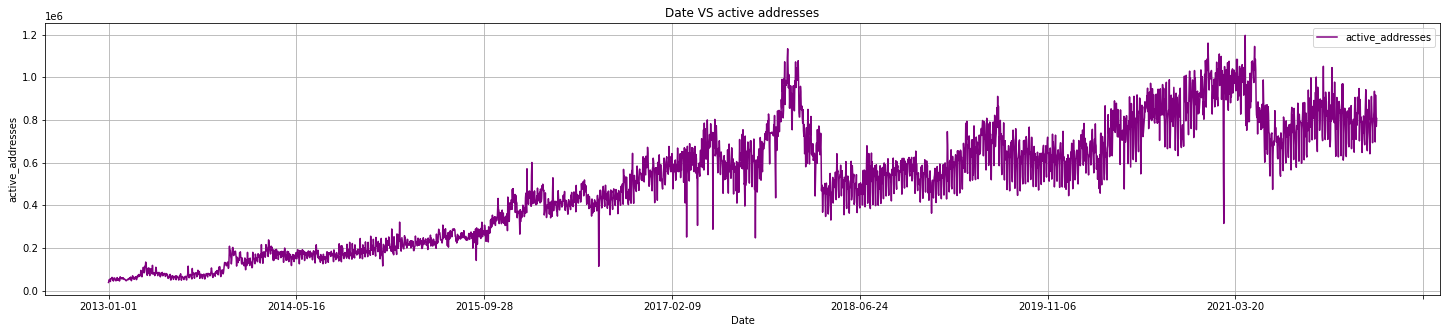

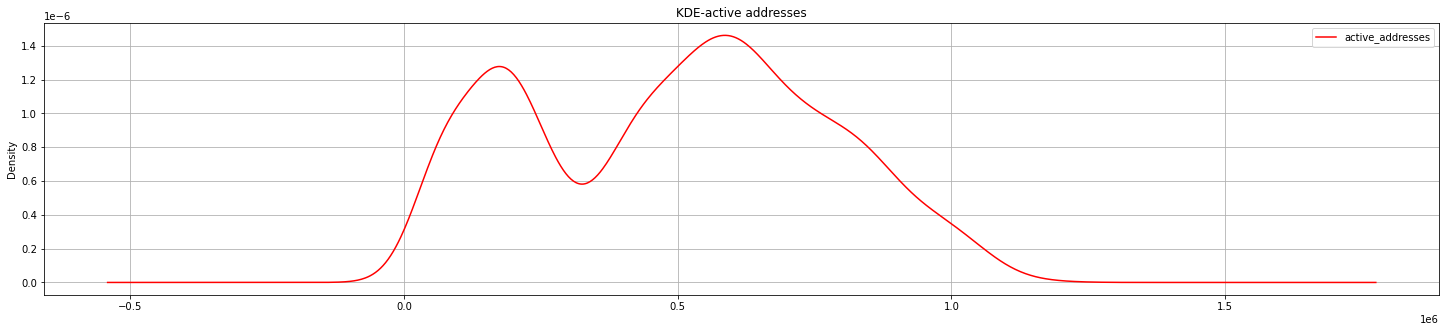

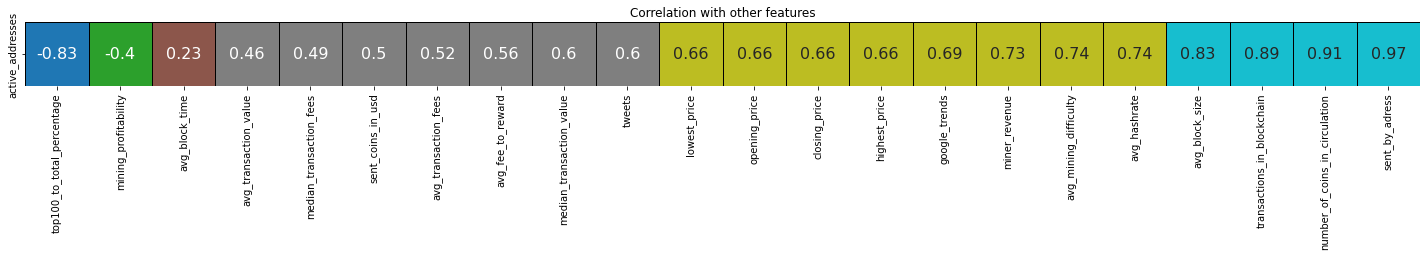

In [11]:
plot_data(final_df,feature_name='active_addresses')

**Observations**

1. Similar to block size and transactions, the number of sent addresses increased over time and it follows an unskewed distribution

2. As sent address is a subset of active addresses, it justifies positive correlation
3. Block size will increase as more number of people make a transaction

### 06.Average mining difficulty per day(Hash Per day)
* The difficulty level reflects how difficult the proof of work calculation with respect to the difficulty value set at the beginning, i.e., 1. 

* A high difficulty means that it will take more computing power to mine the same number of blocks, making the network more secure against attacks.

* The difficulty is adjusted every 2016 blocks (every 2 weeks approximately) so that the average time between each block remains 10 minutes. 

* It will be increased if more number of blocks are being created within a 2-week period and will be reduced if less  blocks are created.

new_difficulty = (old_difficulty X (2016 blocks X 10 minutes)) / (the time took in minutes to mine the last 2016 blocks)

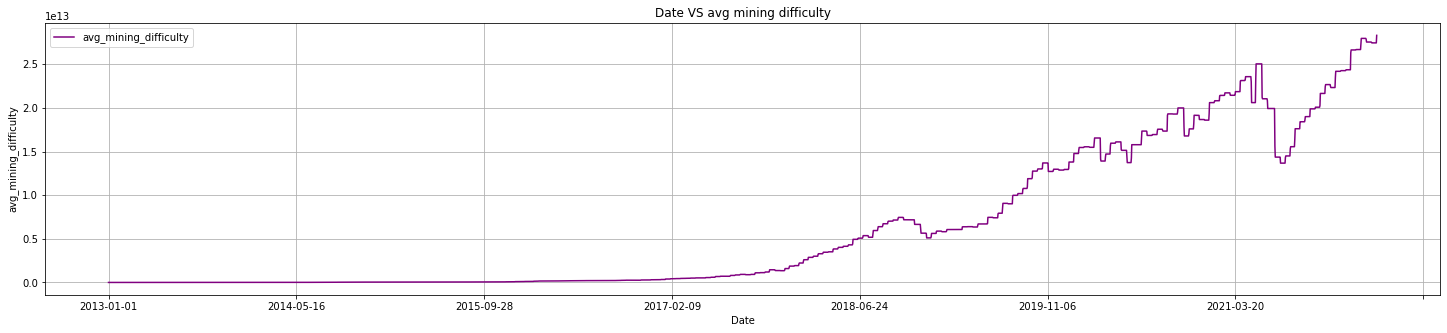

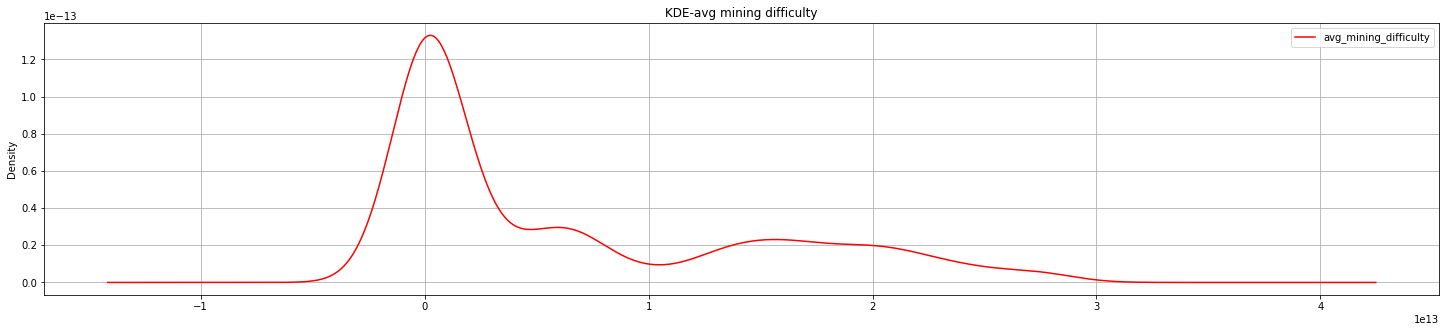

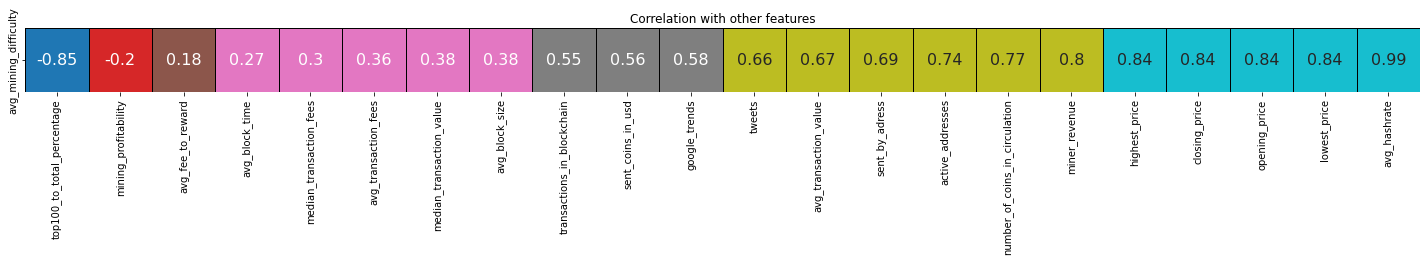

In [12]:
plot_data(final_df,feature_name='avg_mining_difficulty')

**Observations**

1. From bar chart we can observe that as bitcoin gained popularity, the number of users increased, making it harder harder to mine the coins.

2. As the difficulty increase more processing power, i.e. hash rate is required thus it shows a high correlation with hash rate



### 07.Average hashrate (hash/s) per day

* Hashrate is a measure of the computational power per second used when mining. It is measured in of hash/second, meaning how many calculations per second can be performed. 

* Machines with a high hash power are highly efficient and can process a lot of data in a single second.

* Mining difficulty directly depends on hash rate

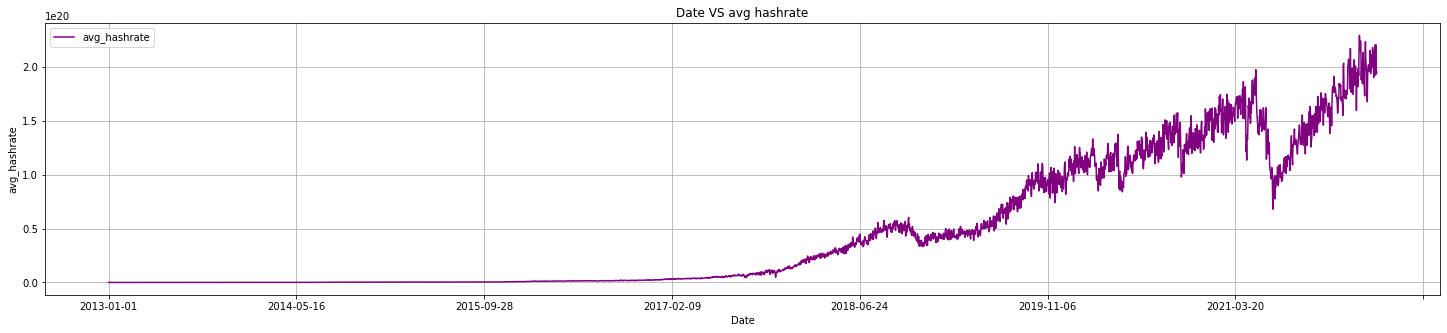

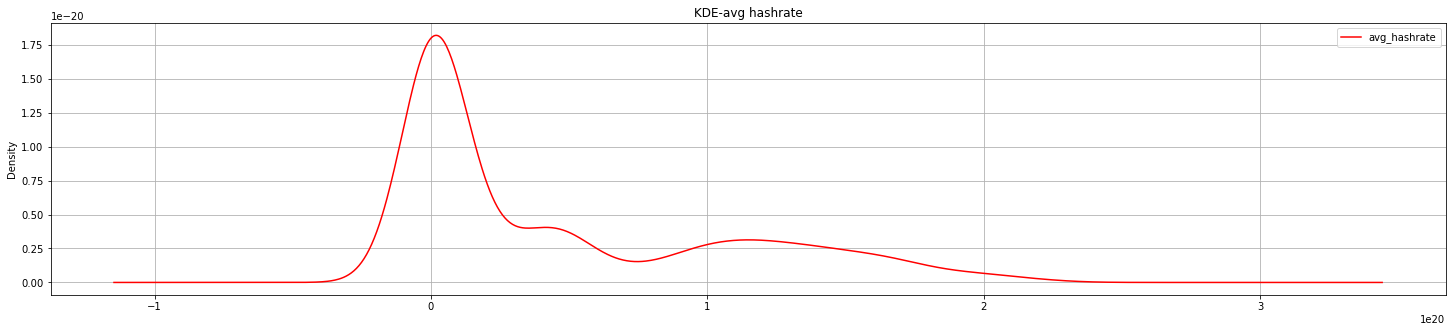

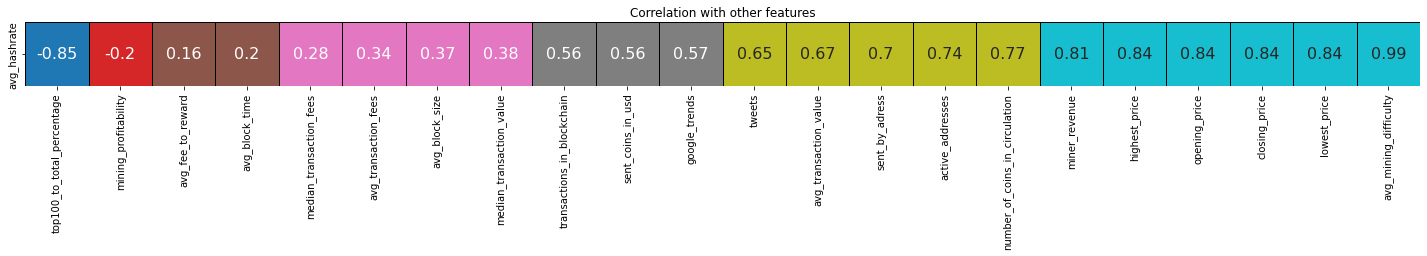

In [13]:
plot_data(final_df,feature_name='avg_hashrate')

**Observations**

1. This follows a very similar trend to mining difficulty as mining difficulty and hashrate are correlated.
2. As more people started mining the blocks, it required more hashing power per day, ultimately increasing the difficulty.
3. Hashrate increased from 2016 and fall in 2018, when the prices declined.

### 08.Mining Profitability USD/Day for 1 Hash/s

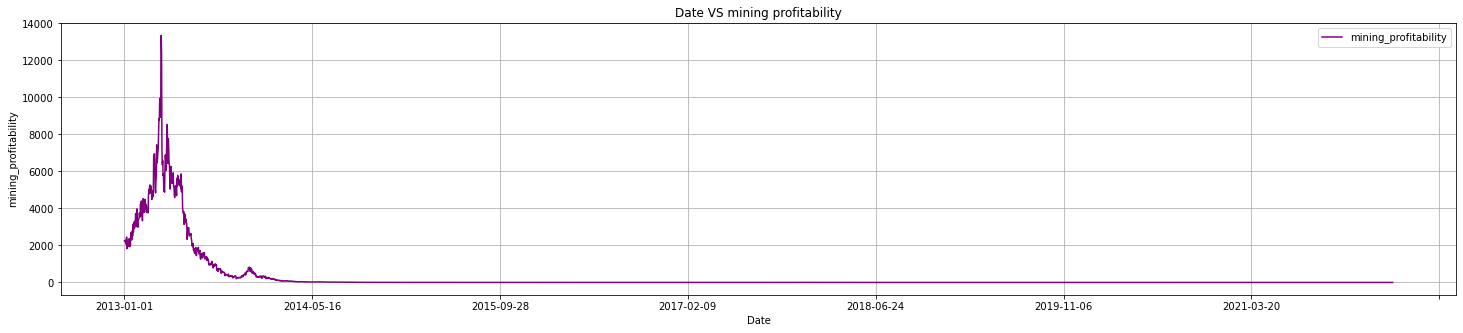

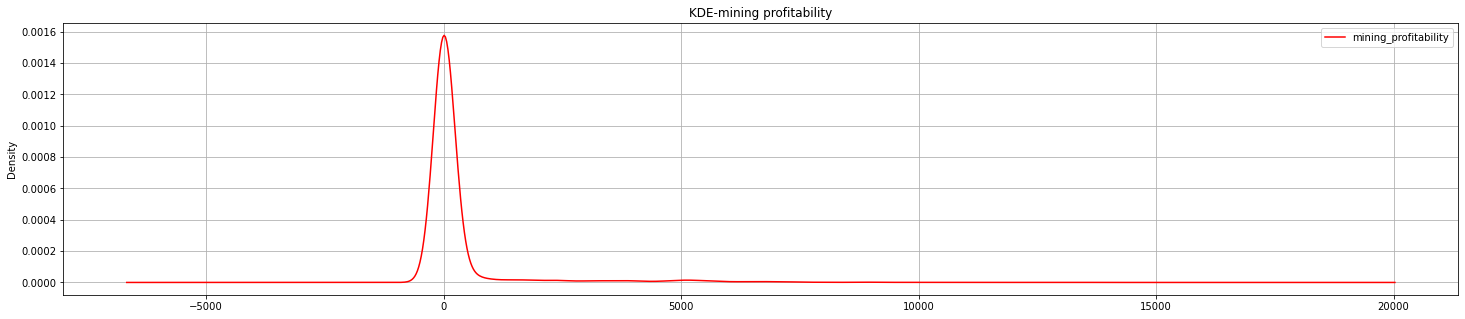

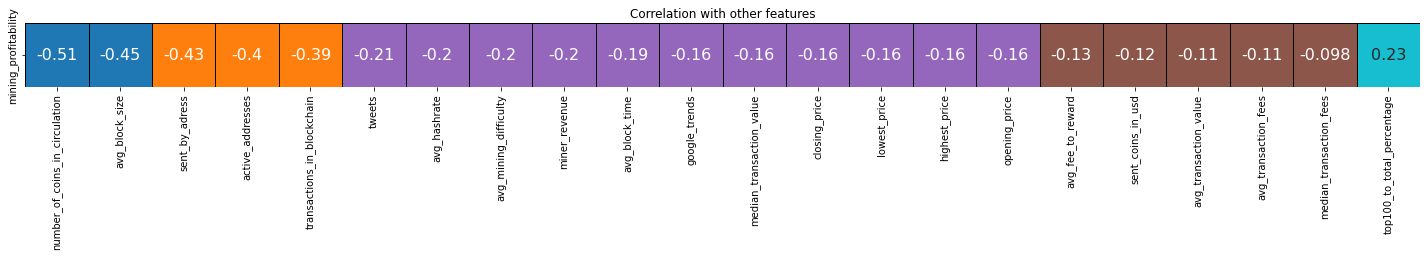

In [14]:
plot_data(final_df,feature_name='mining_profitability')

**Observations**

1. The distribution is heavy peaked and right skewed.

2. The bar plot implies that as the popularity gained, the profitability decreased heavily. 
3. The profitability doesn’t have any relation with majority of features but has some positive correlation with top 100 to total ratio. 

### 09.Sent coins in USD per day

This are total Bitcoins sent daily in USD.

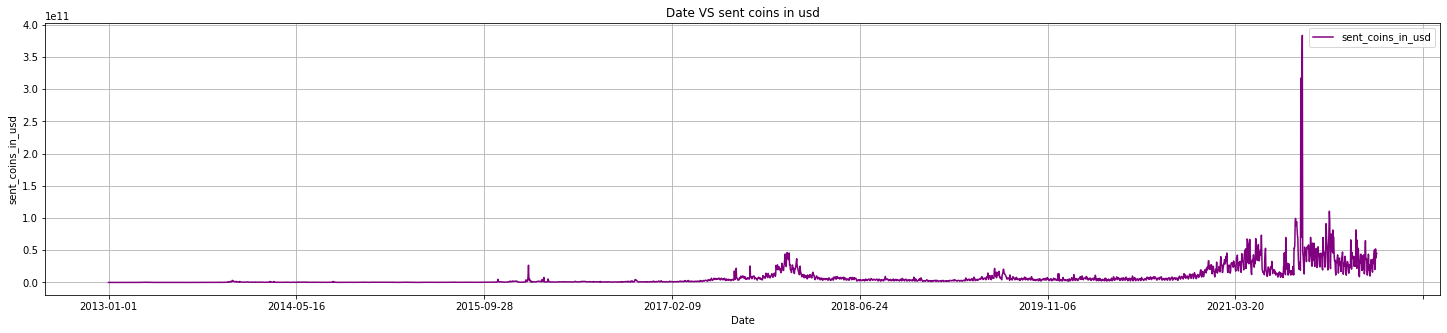

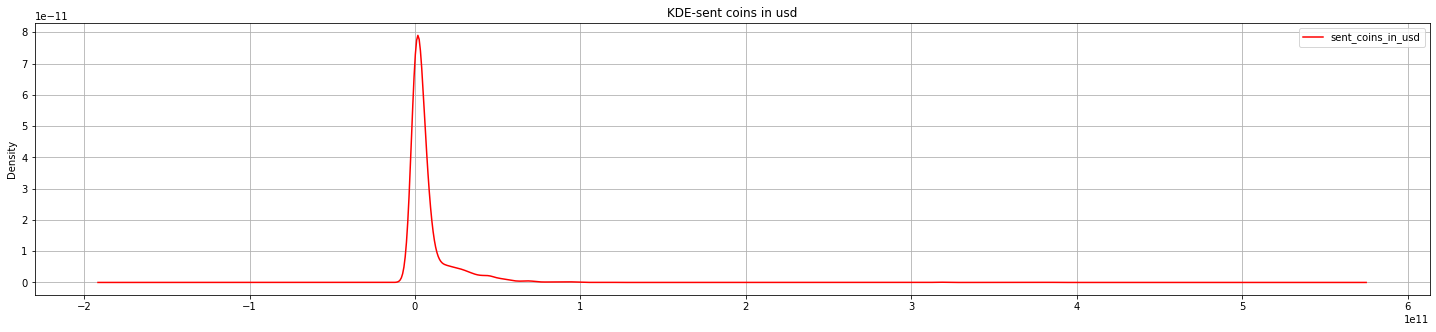

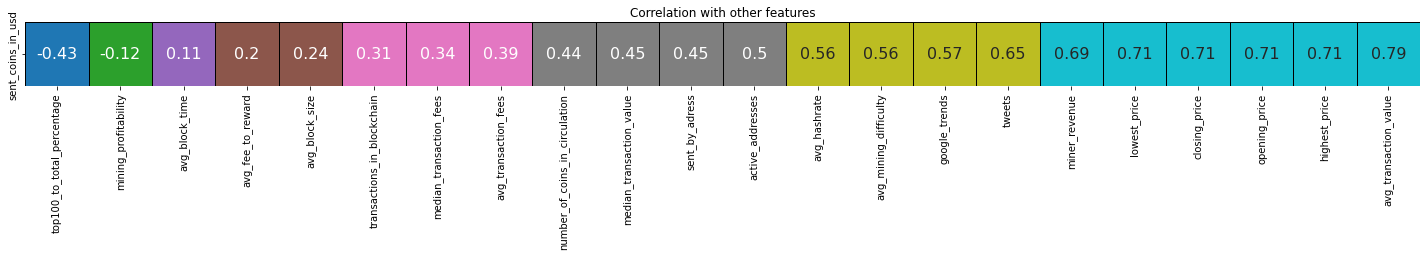

In [15]:
plot_data(final_df,feature_name='sent_coins_in_usd')

**Observations**

1. The distribution is heavy peaked and right skewed.

2. As the prices have increased, the number of transactions also have increased
3. Sent coins has a good correlation with EOD prices, transaction values and google trends.



### 10 & 11.Average & Median transaction fee, USD
* Each transaction can have an associated transaction fee determined by the sender. The miners who verify the transaction receive the transaction fee.

* Transactions with higher fees reward the Bitcoin miners to process them sooner than transactions with lower fees

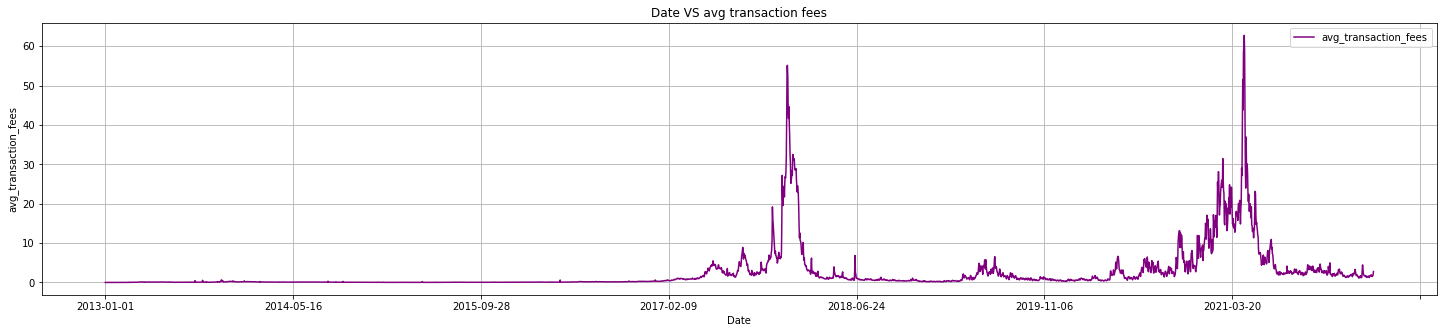

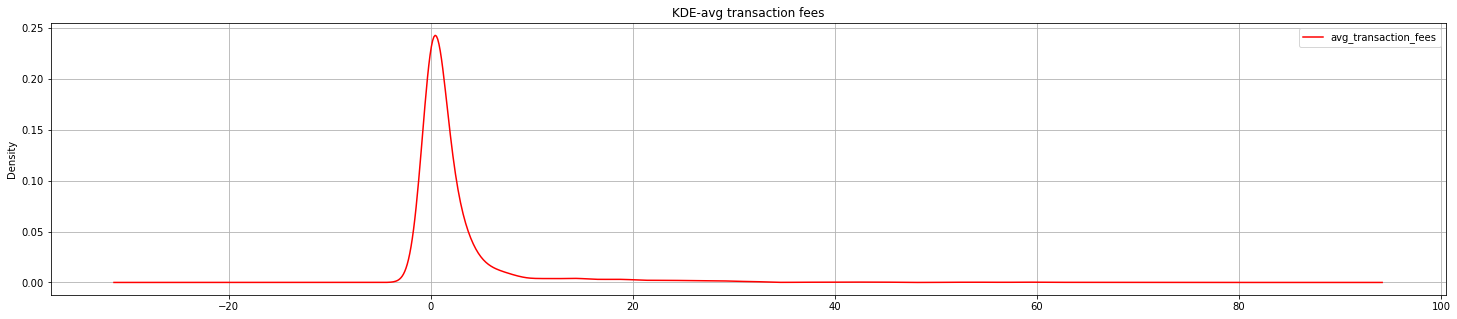

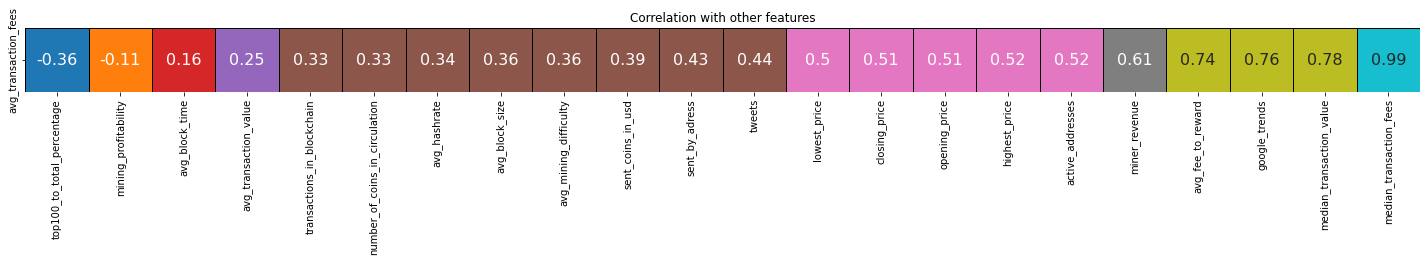

In [16]:
plot_data(final_df,feature_name='avg_transaction_fees')

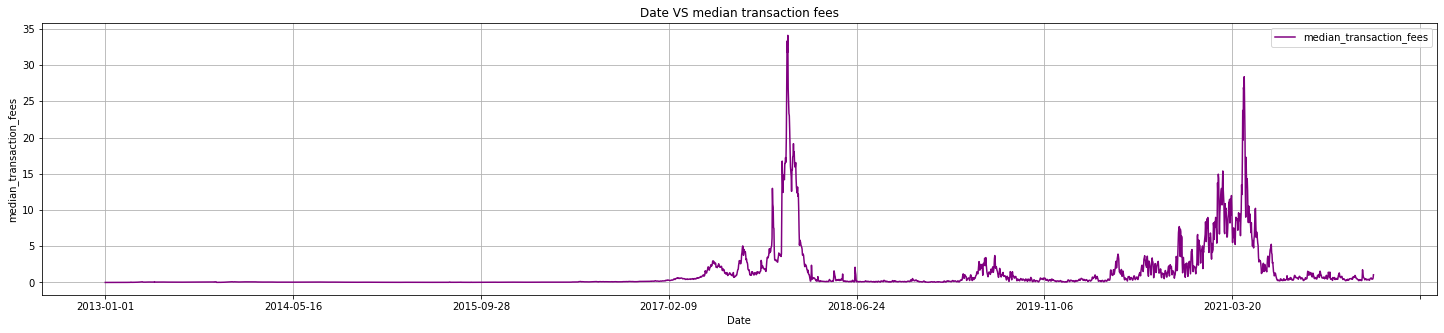

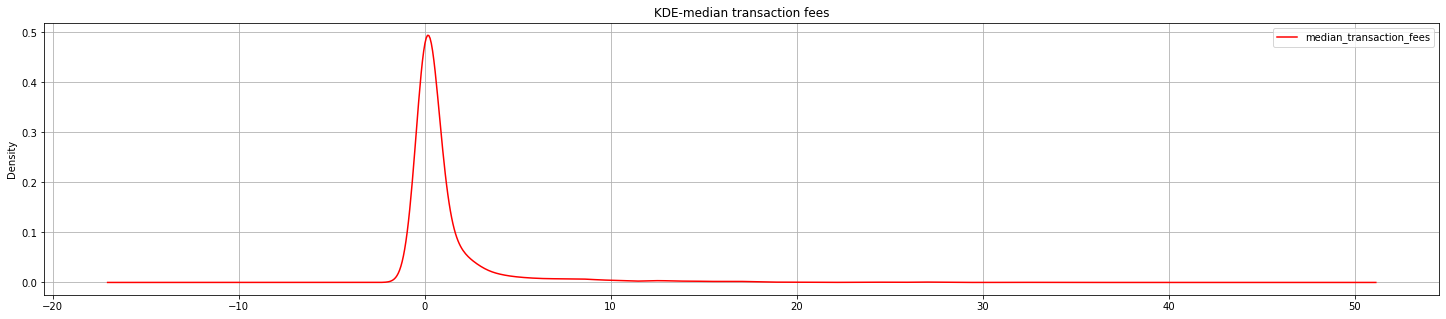

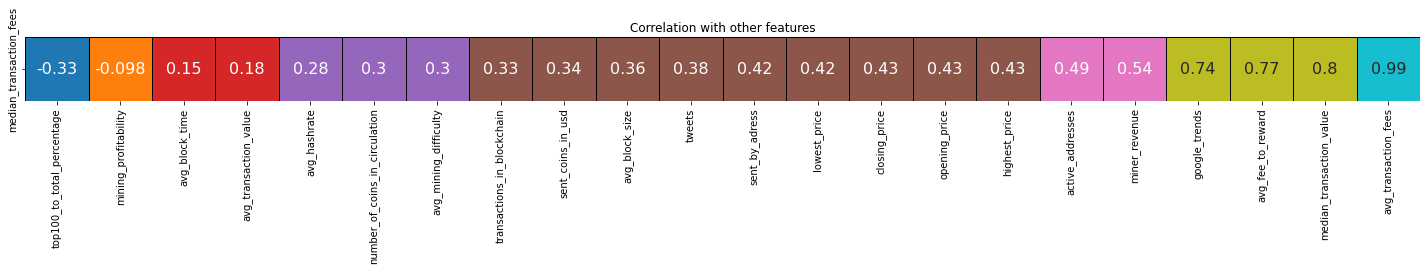

In [17]:
plot_data(final_df,feature_name='median_transaction_fees')

**Observations**

1.   The transaction fees paid to miners has very skewed distribution
2.   Intuitively, it can be understood that as prices increased, the fees also increased but with a correlation with price is less than compared to google trends, number of sent coins.
3.  Both average fee and median fee follow a very similar distribution, which implies that for on a single day, neither the fees paid are paid heavily nor they are too less



### 12.Average block time (minutes)
* Block time is the time required to create the next block in a chain. It is a time taken by a blockchain miner to find a solution to the hash, the random series of characters that are associated with the block.

* For a bitcoin, usually it is around 10 minutes but can fluctuate depending on the hashrate of the network.

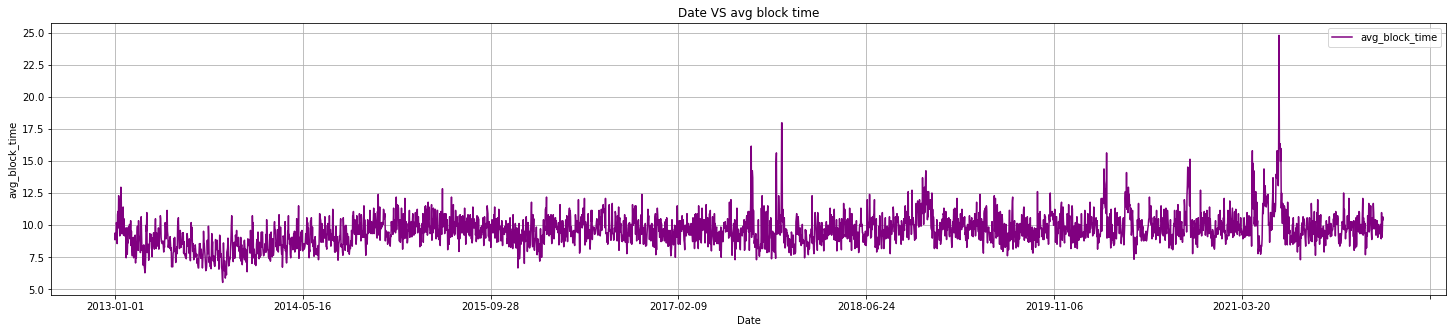

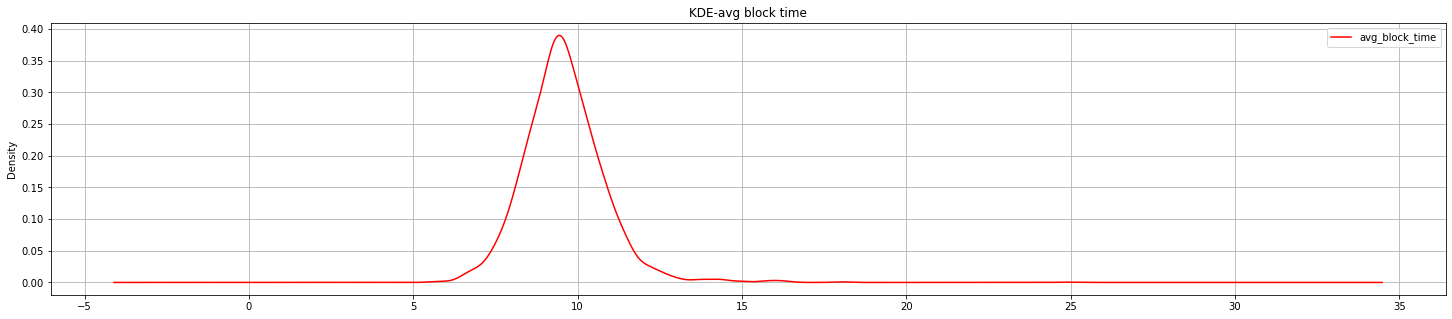

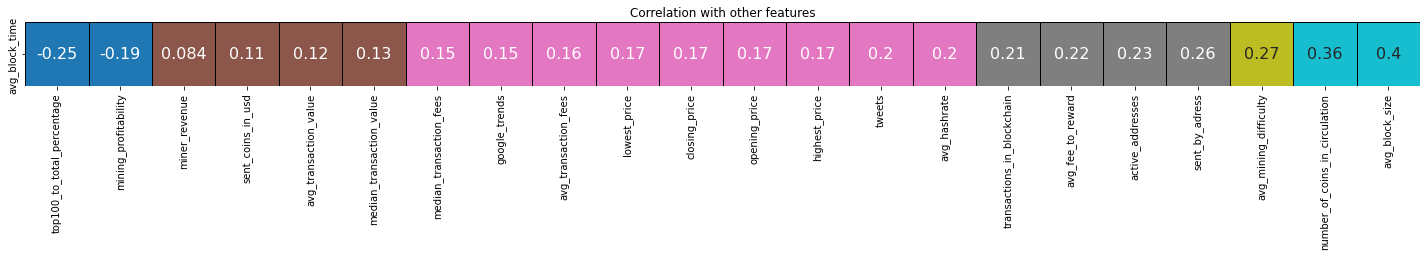

In [18]:
plot_data(final_df,feature_name='avg_block_time')

**Observations**

1.   The time required to mine a block mostly remains around 10 minute (IQR of 8.79 to 10.2)

2.   The higher block time implies higher difficulty and lower values tell lower difficulty. We can also observe this from positive correlation with mining difficulty and the number of sent by addresses.



### 13 Avg. Transaction Value in USD

The average value of the transactions in Bitcoin

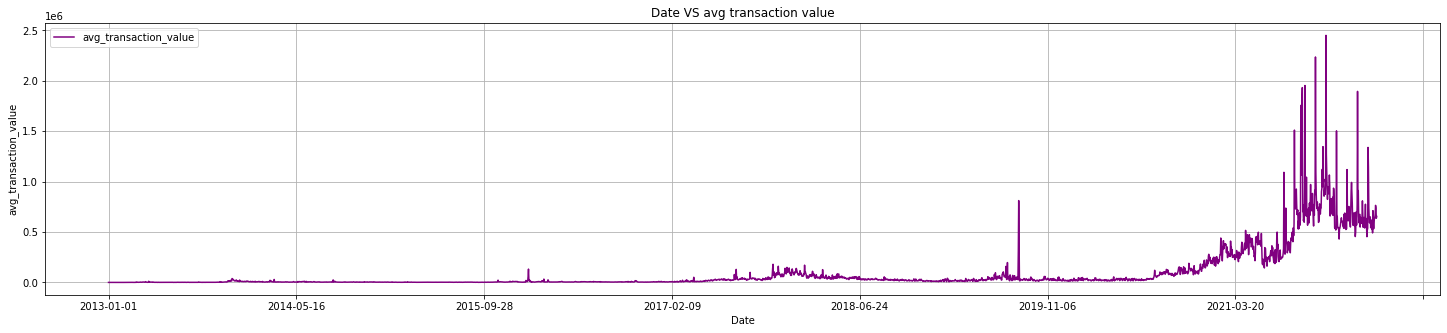

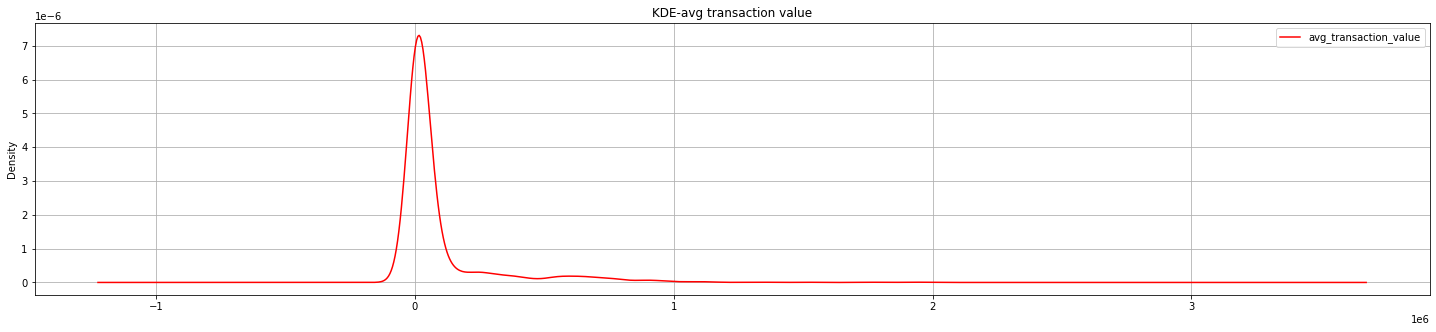

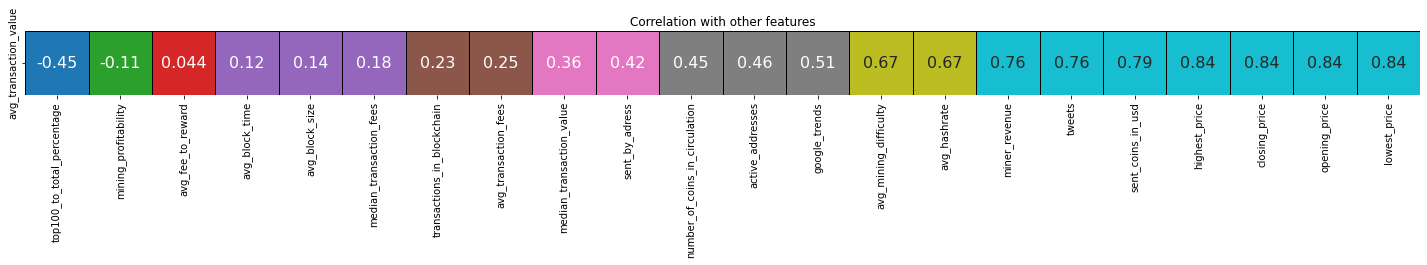

In [19]:
plot_data(final_df,feature_name='avg_transaction_value')

**Observations**

1.  The average transaction increase is because of Bitcoin whales and institutional investors are adding more cryptocurrency to their portfolios. 

2.   As interest in cryptocurrencies increased and cryptocurrency market caps reached peaks, daily transactions also increased to a peak of. This is also visible from high correlation with market cap.



### 14.Median Transaction Value in USD

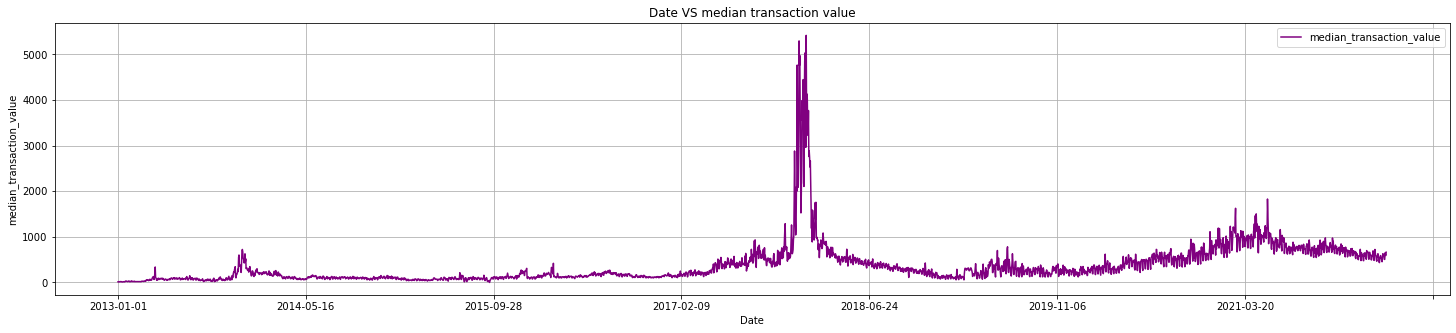

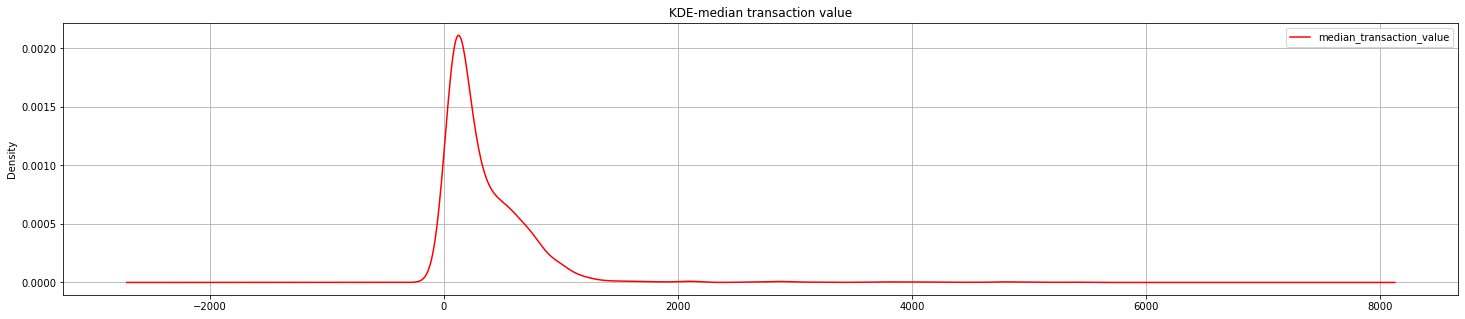

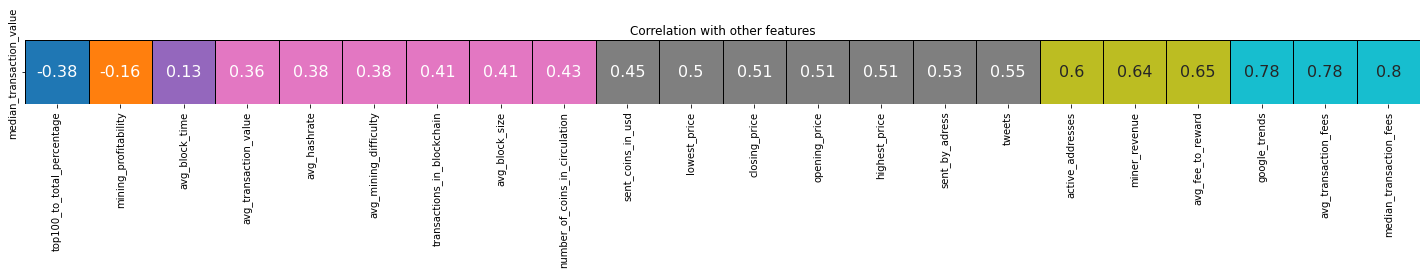

In [20]:
plot_data(final_df,feature_name='median_transaction_value')

**Observations**

1.   Unlike transaction fees, median and avg transaction values are not highly correlated, which implies on a single day there are outliers in transaction value.

2.   As seen in avg transaction value, Big players are trying to buy more but those transactions are outliers, making median value less correlated to avg.



### 15.Number of coins in circulation
* The total number of mined bitcoin that are currently circulating on the network.

*  The total supply of BTC is limited and pre-defined in the Bitcoin protocol at 21 million, with the mining reward decreasing over time. This graph shows how many Bitcoins have already been mined or put into circulation.

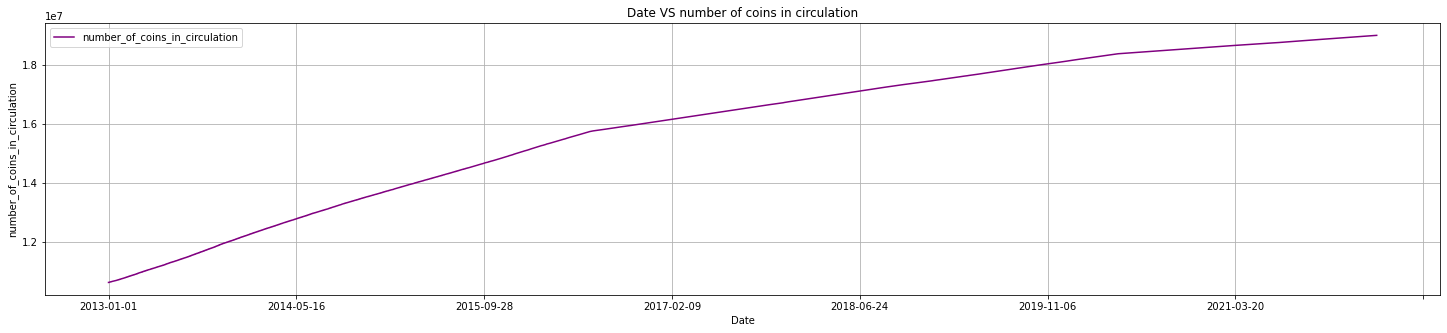

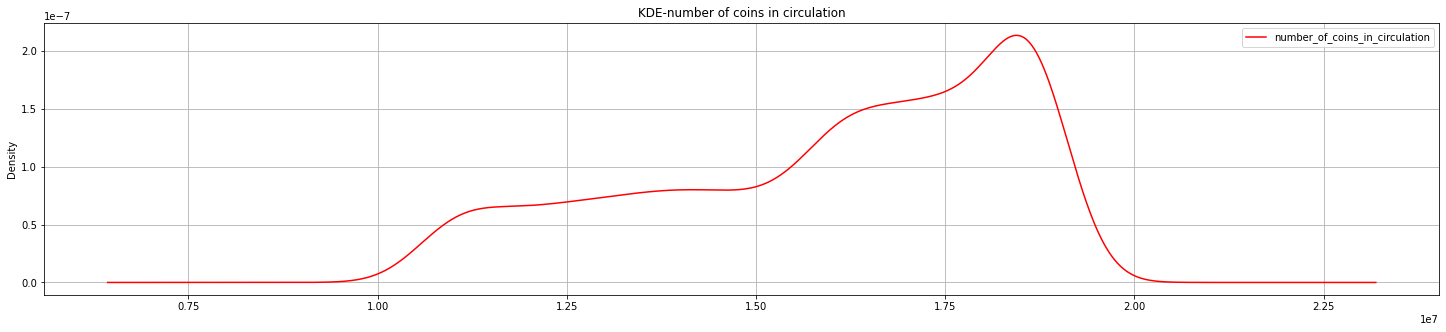

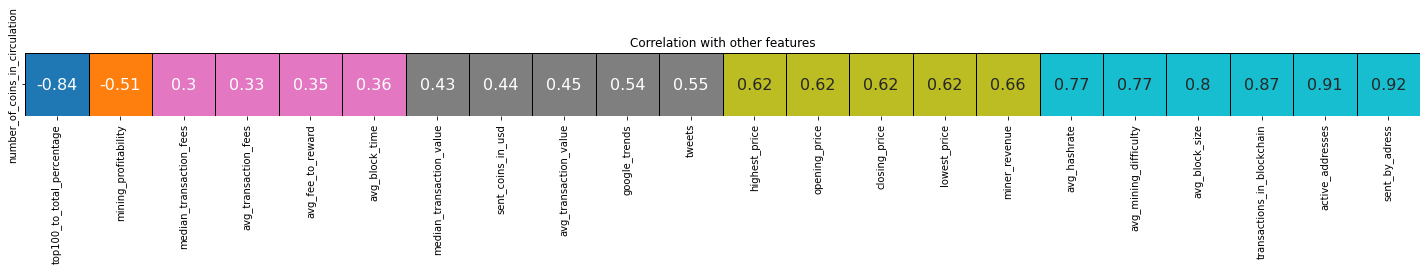

In [21]:
plot_data(final_df,feature_name='number_of_coins_in_circulation')

**Observations**

1.   This graph shows the supply of bitcoins in the market. 

2. Although the direct correlation is less, but this feature might be helpful in predicting the price as prices directly depend on supply. currently demand is higher than supply so despite higher supply the prices continue to price



### 16.Miner Revenue
* Total value in USD of coinbase block rewards and transaction fees paid to miners.

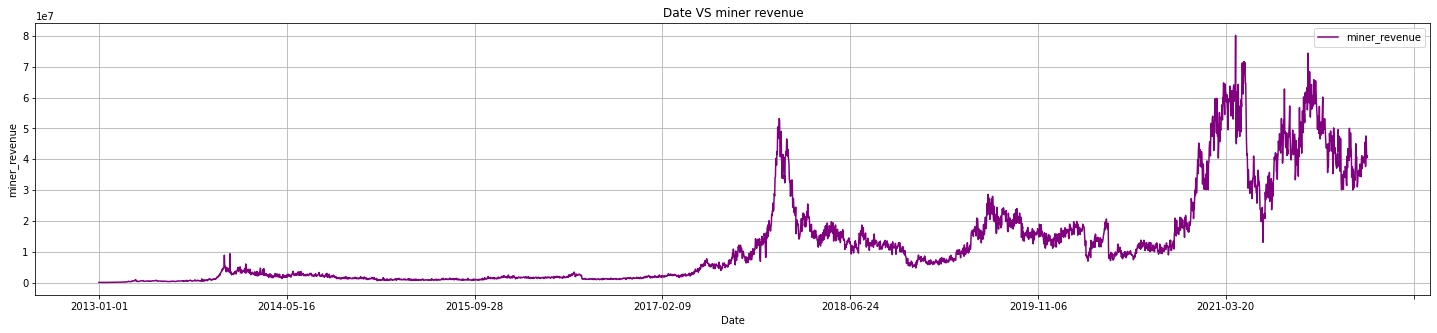

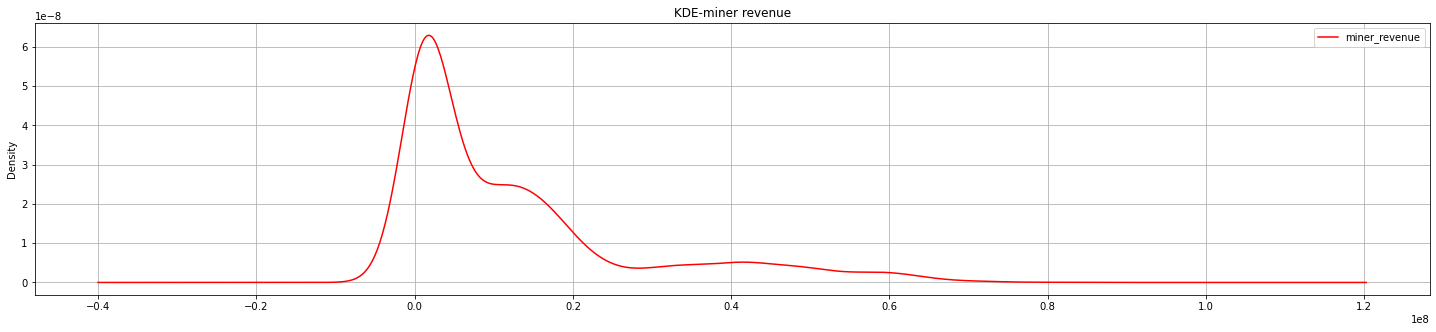

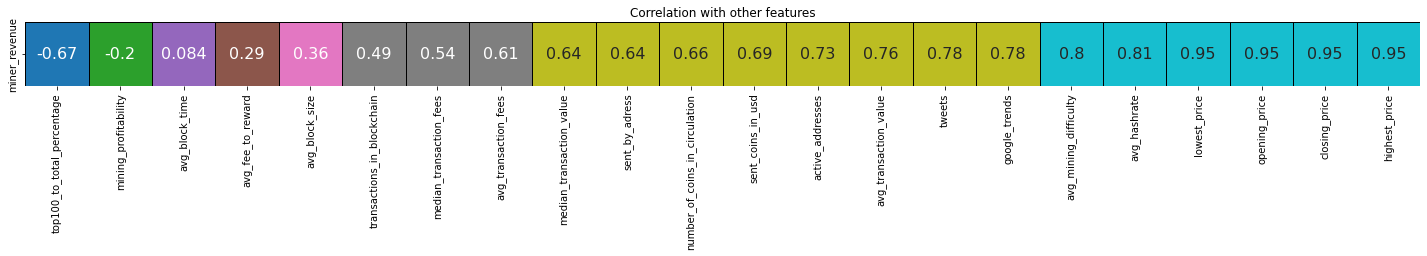

In [22]:
plot_data(final_df,feature_name='miner_revenue')

**Observations**

1.  This feature shows very high correlation with all target varaiables. As miners get a bitcoin as a reward thus increasing supply of bitcoins which ulimately impacts the price.



### 17 & 18.Tweets & Google Trends to "Bitcoin"  per day

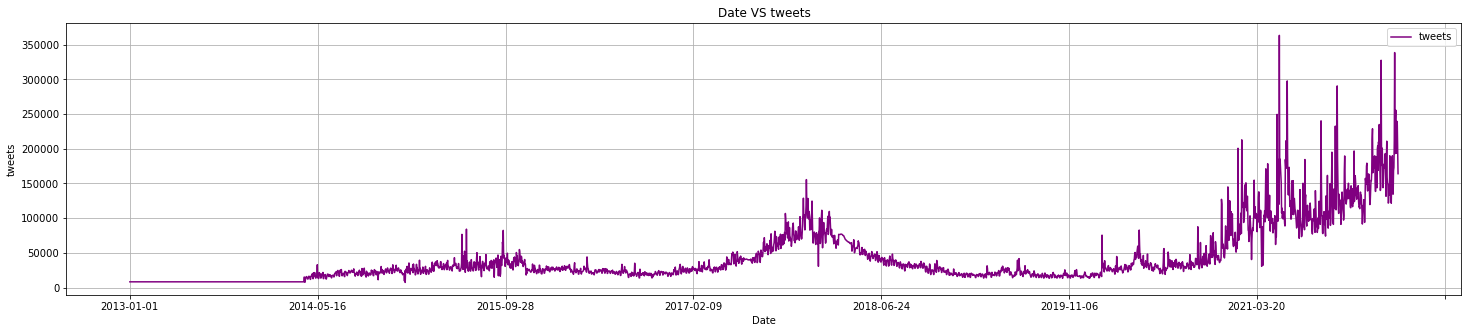

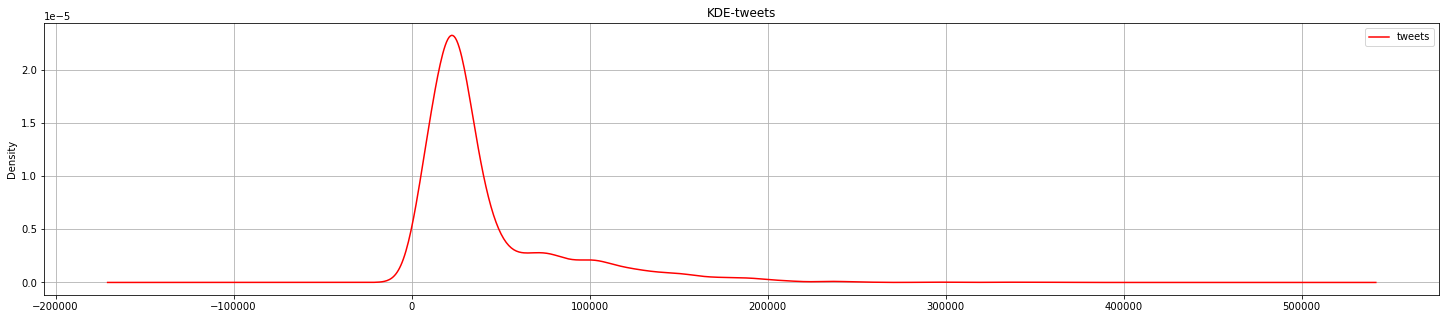

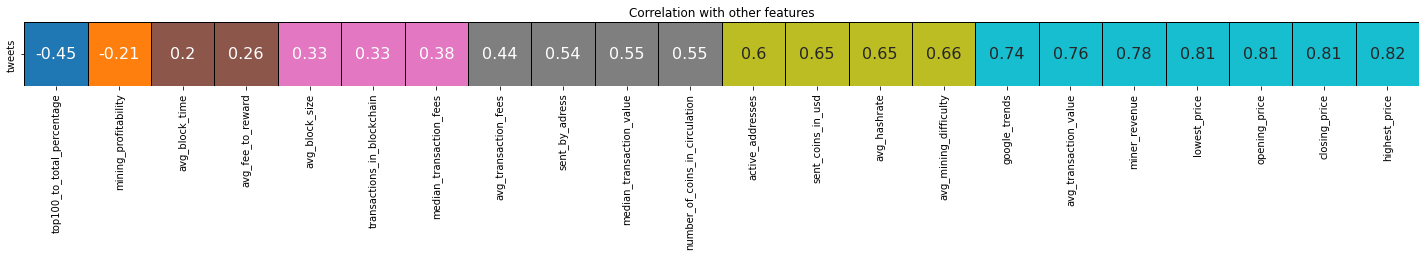

In [23]:
plot_data(final_df,feature_name='tweets')

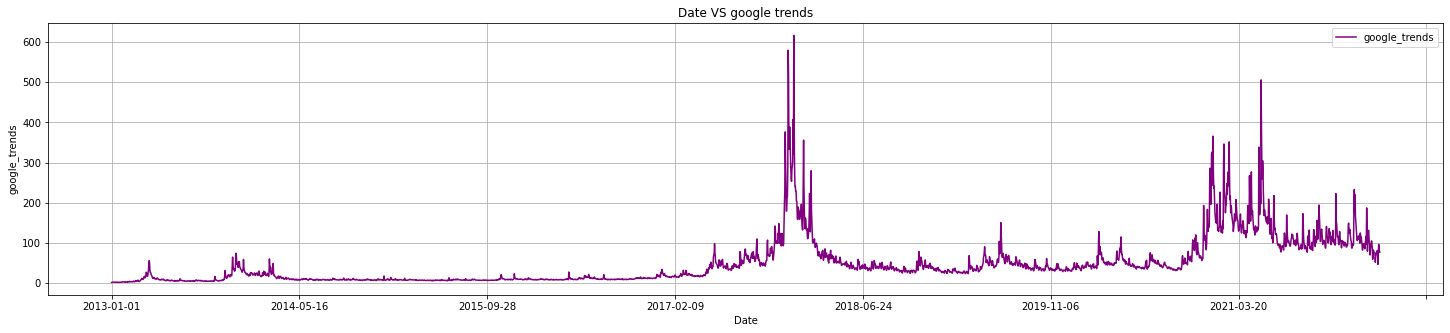

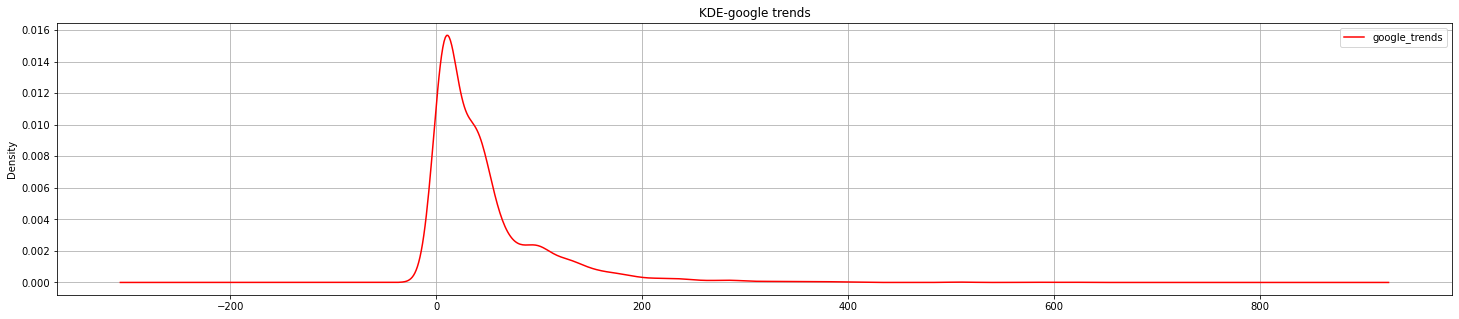

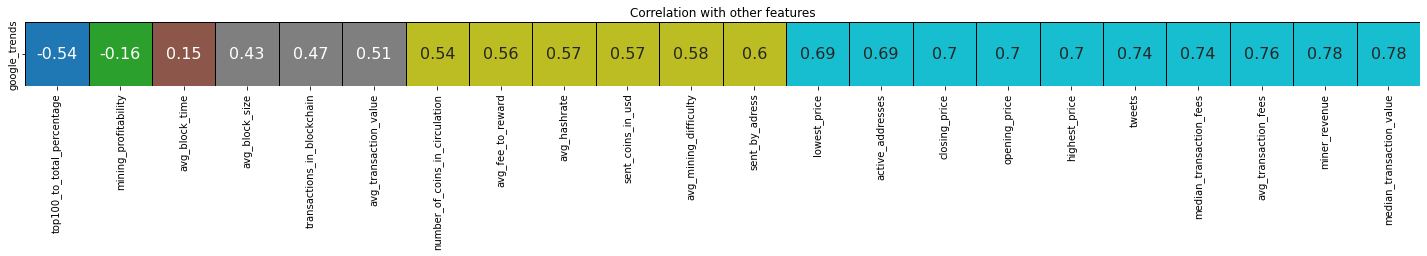

In [24]:
plot_data(final_df,feature_name='google_trends')

**Observations**

1.   Both social media trends seem useful for prediction as both of them show a good correlation with each other and a positive correlation with price.

2. As bitcoin is a digital currency, it affects the social media such that if prices increase or as the number of sent coins increase, bitcoin trends on social media.

3. The popularity of the bitcoin has be drastically increasing from the year 2013 and is on it’s peak in the year of 2021 to 2022. There has been an upsurge in the coins popularity during 2017-2018. This is being concluded by tweets made on Bitcoin over the years and the Google trends. The same can be inferred from the plots above.

### 19.Top 100 Richest Addresses to Total coins %

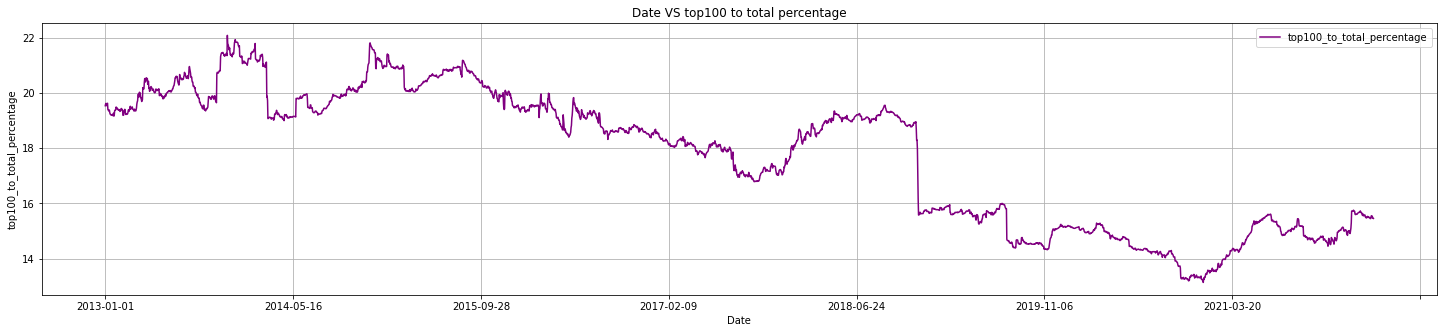

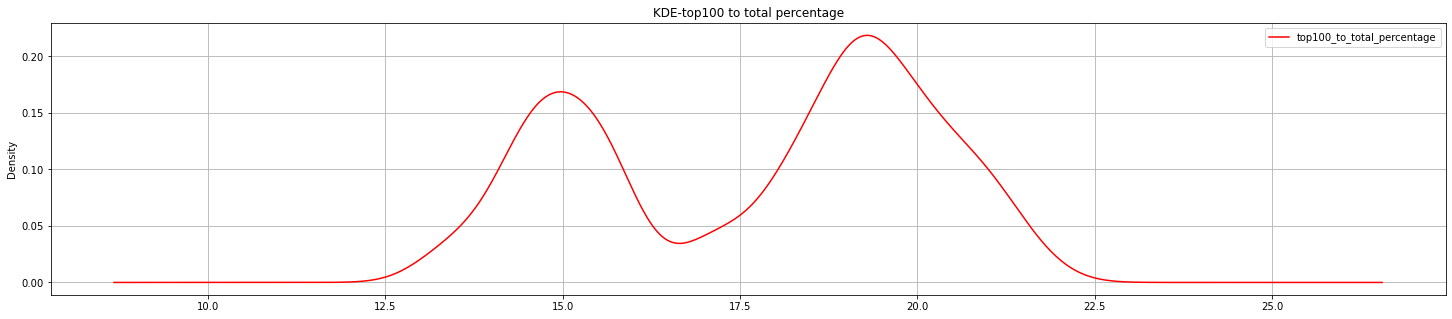

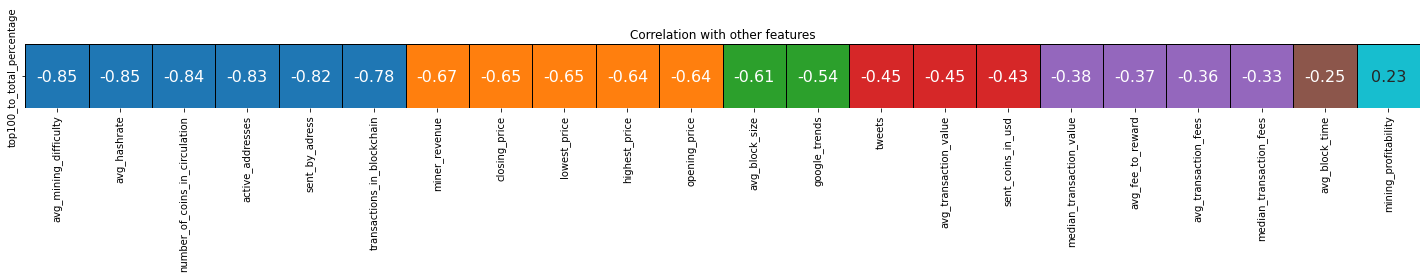

In [25]:
plot_data(final_df,feature_name='top100_to_total_percentage')

**Observations**

1.  Since the inception of bitcoin, mostly top 100 remained between 15% to 19%

2. With more people joining the bandwagon, the top 100 percentage has been decreased and currently stands around 15

3.   Feature mostly has inverse correlation with other features and has some positive correlation with profitability of mining as few people who got profit belong to top100



### 20. Average Fee Percentage in Total Block Reward
* Bitcoin block rewards are new bitcoins awarded to cryptocurrency miners for being the first to solve a complex math problem and creating a new block of verified bitcoin transactions. 

* It started at 50 BTC and halves every 210,000 blocks. The current reward lies at 6.25.

* Following feature is the ratio of the fee sent in a transaction to the reward

for verifying that transaction by the other users.

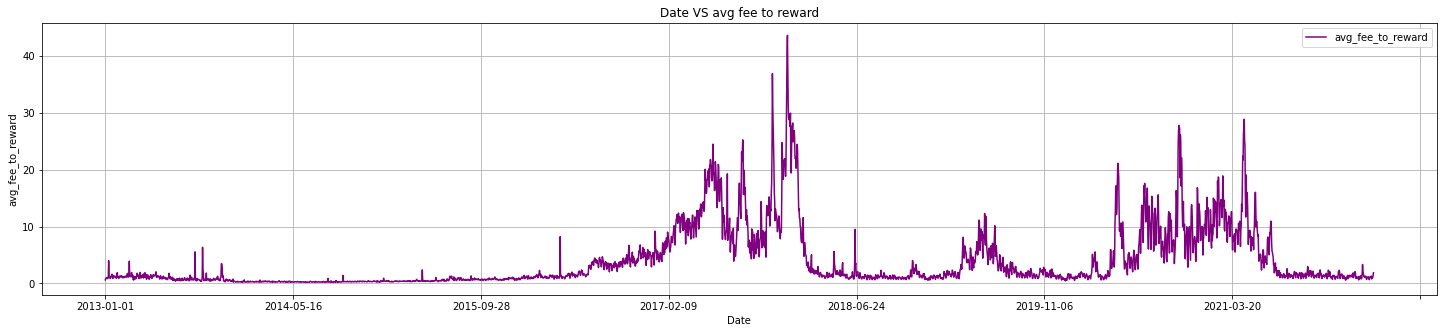

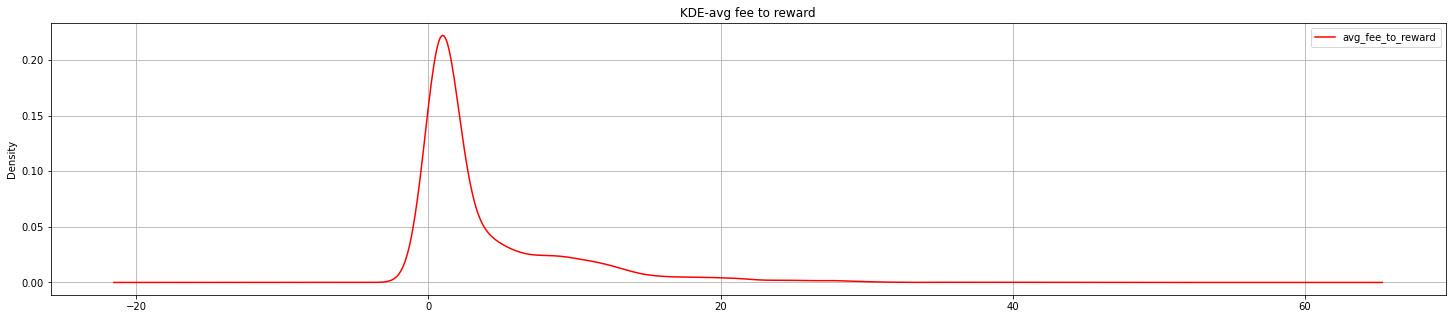

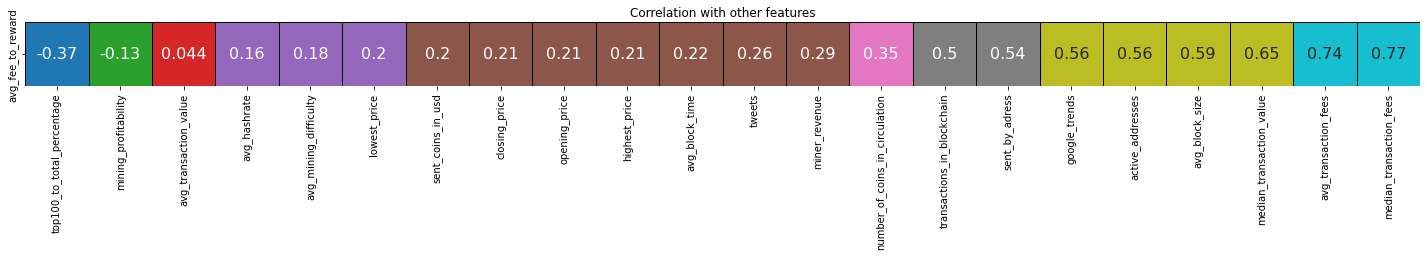

In [26]:
plot_data(final_df,feature_name='avg_fee_to_reward')

**Observations**

1.   In the period from 2013 to 2016, the reward was 25 bitcoins, but the fees paid are less.

2.   From period 2016 to 2020, the reward was reduced to 12.5 BTC. In this period the fees paid are most as where maximum value is around 43% of reward.

3. From June 2020, the rewards were decreased to 6.25. Now the fees paid are less compared to earlier ratio, but the ration increases as the denominator is reduced.
4. The correlation with transaction fees is expected but also can be observed with google trends and number of sent by address.



### 21. OHLC Features 

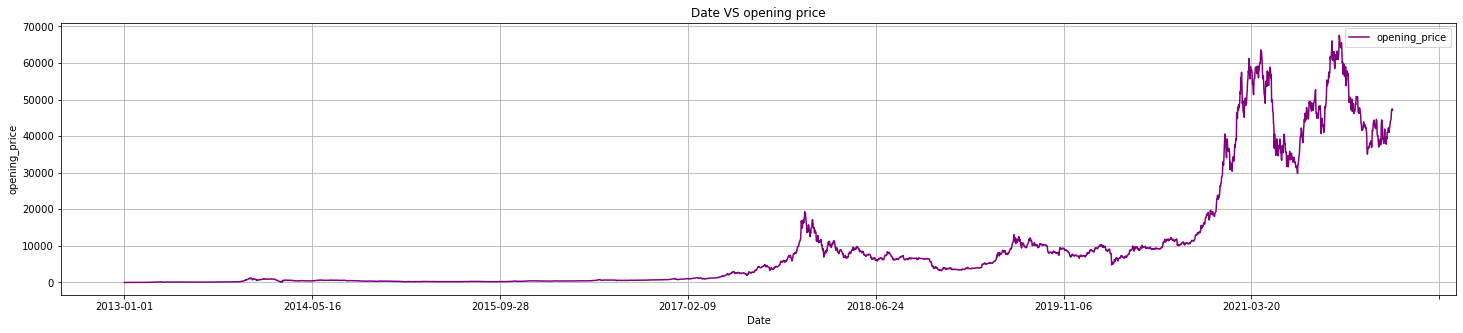

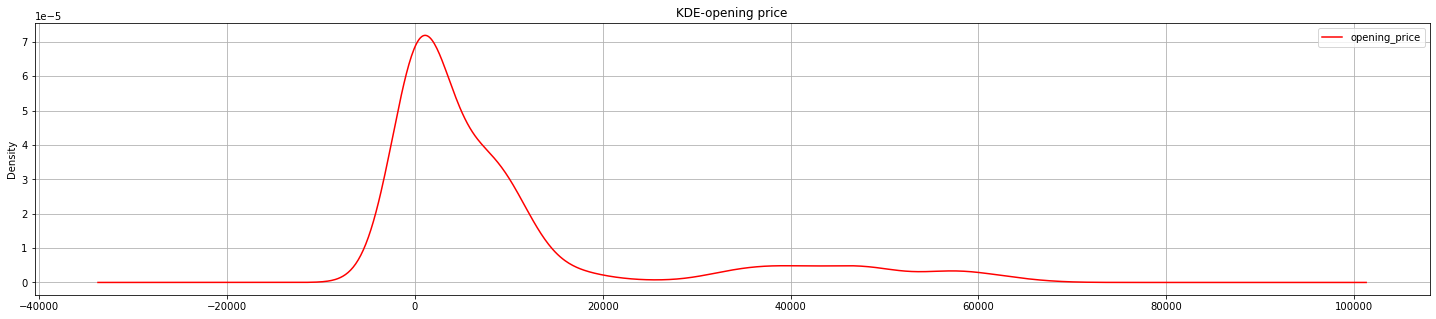

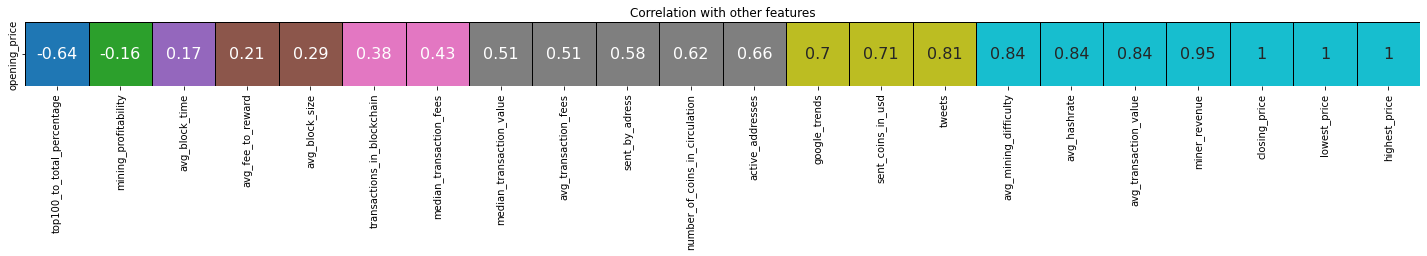

In [27]:
plot_data(final_df,feature_name='opening_price')

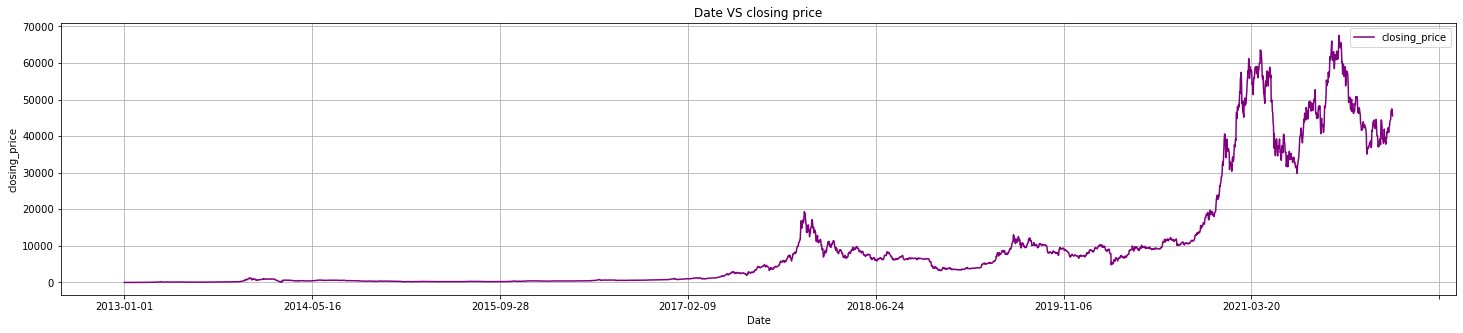

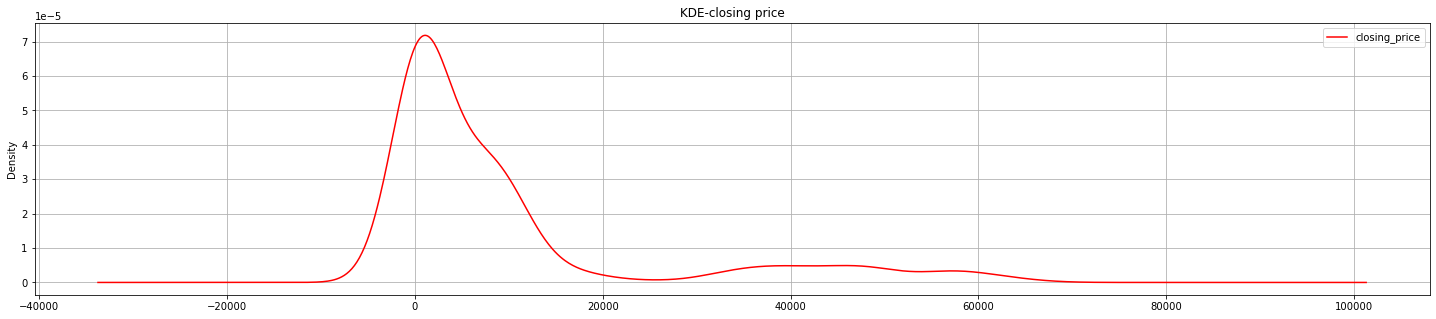

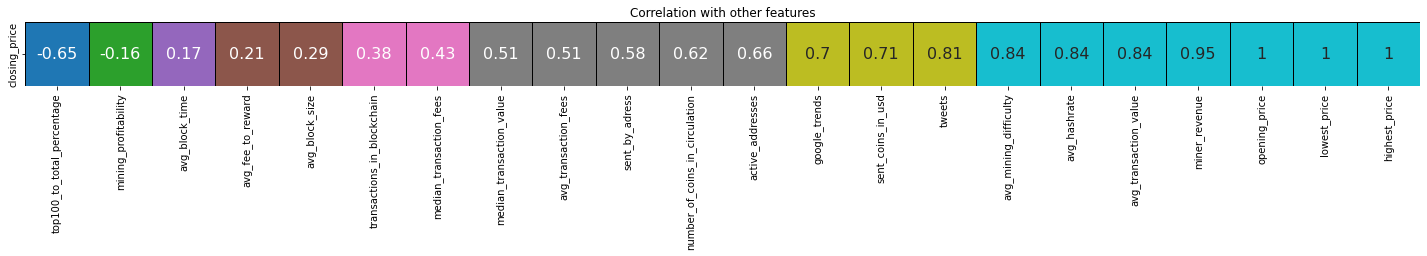

In [28]:
plot_data(final_df,feature_name='closing_price')

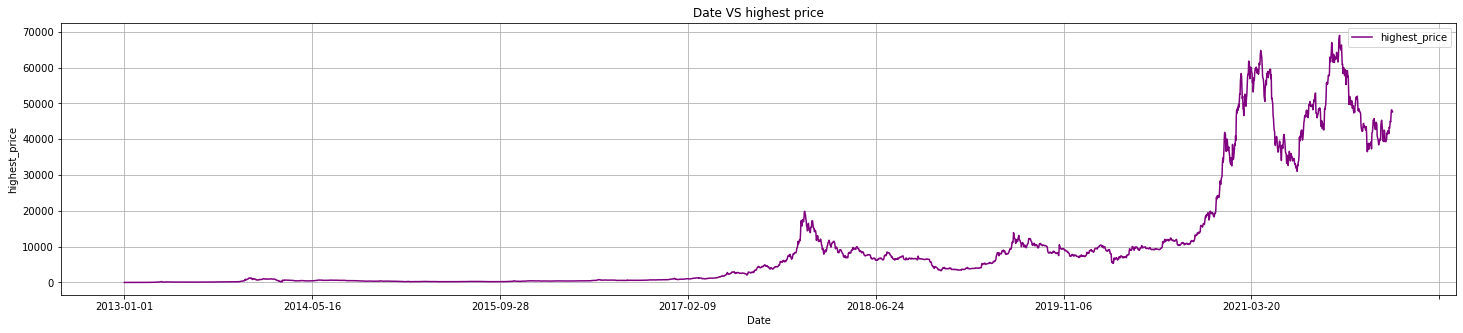

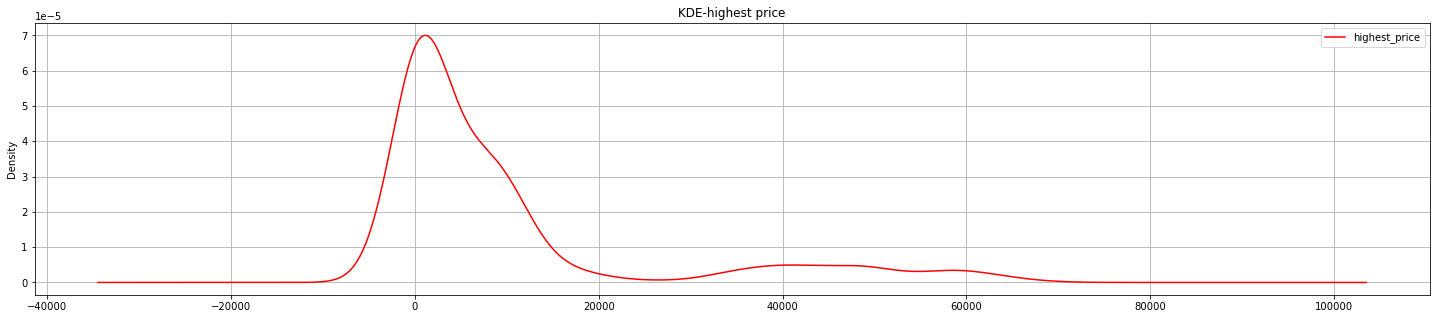

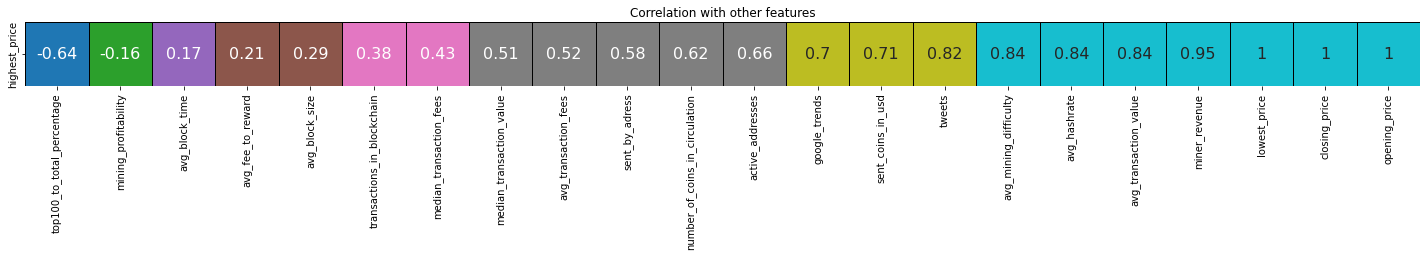

In [29]:
plot_data(final_df,feature_name='highest_price')

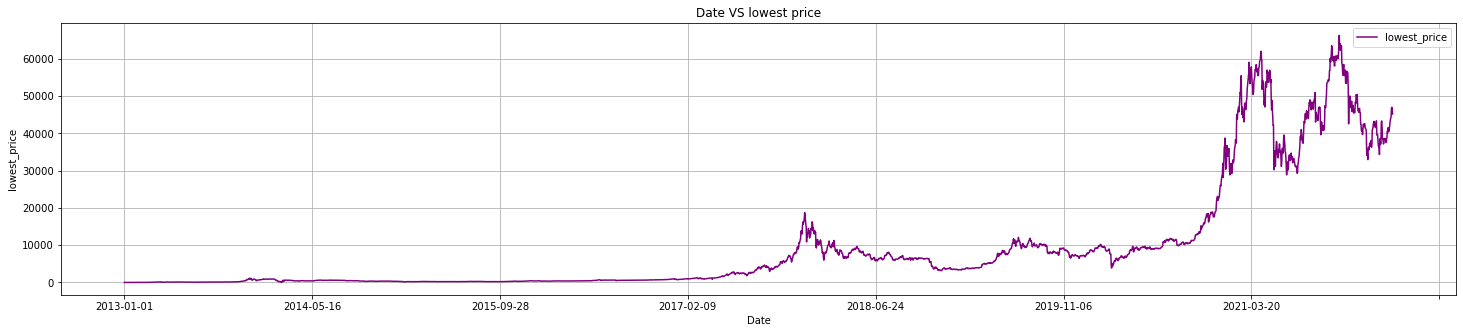

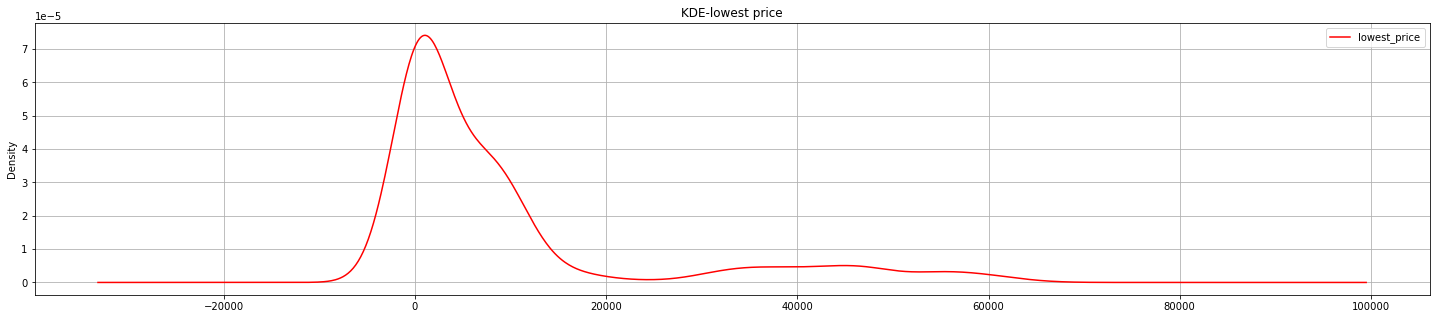

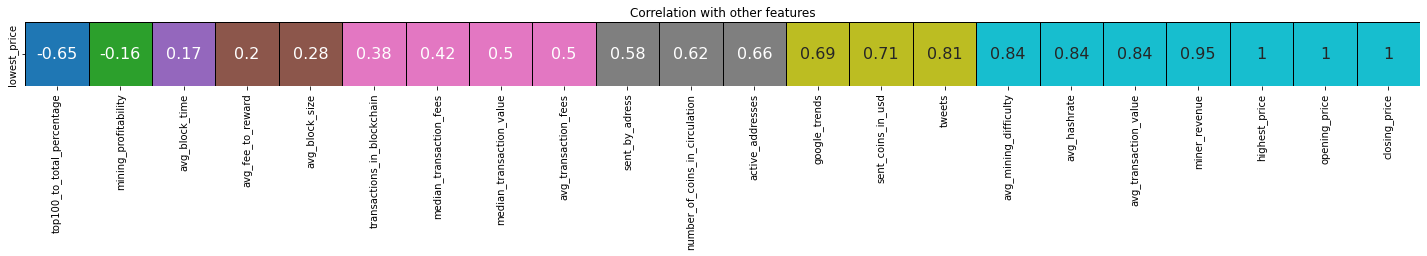

In [30]:
plot_data(final_df,feature_name='lowest_price')

In [31]:
def plot_scatter(df,scatter_list,scatter_with):
    
    fig,axs = plt.subplots(1,len(scatter_list),sharey=False,figsize=(7*len(scatter_list),7))
    colors = plt.rcParams["axes.prop_cycle"]()
    for i,feat in enumerate(scatter_list):
        x = sorted(list(df[scatter_with]))
        y = sorted(list(df[feat]))

        axs[i].scatter(x,y,marker=".",color=next(colors)["color"],label=feat)

        line = mlines.Line2D([0, 1], [0, 1], color='black',linestyle=':',label='Normal Line')
        transform = axs[i].transAxes
        line.set_transform(transform)
        axs[i].add_line(line)
        axs[i].set_ylabel(feat)
        axs[i].grid()
        axs[i].set_xlabel(scatter_with)
        axs[i].legend()
    plt.show()

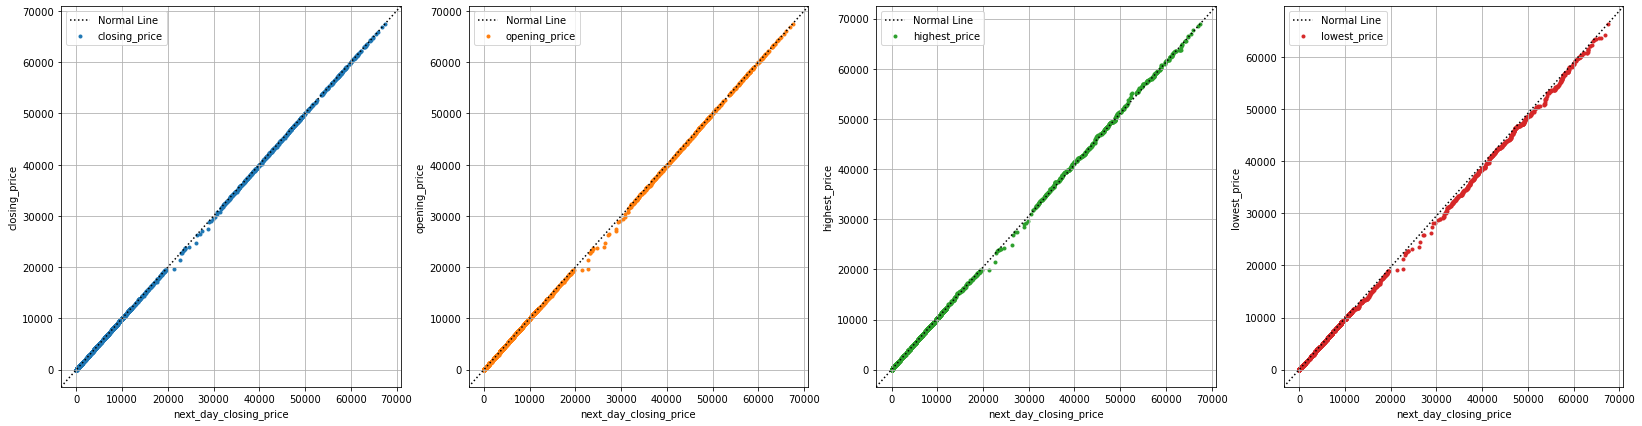

In [32]:
scatter_list = ['closing_price','opening_price','highest_price','lowest_price']
plot_scatter(final_df,scatter_list,'next_day_closing_price')

#### Observations
1. All the OHLC variables have shown no trends untill 2017, after this year, we observe a gradual increase in the trends of prices. There is an increase in the trend of prices untill 2021 and there a sharp  decline post that. This decline is slowly catching up and improving.   
2. The highest price observed was above 60,000 USD during year 2021 to 2022.
3. All the OHLC features are extremly right skewed.
4. All the OHLC have strong positive correlation among themselves. 
5. The scatter plots of OHLC features against the next day closing price displays linear relationship.
6. Hence, for the prediction of next day's closing price of the bitcoin, OHLC features will be very useful

### Combined Correlation

In [33]:
c = final_df.corr().abs()
s = c.unstack() 
so = s.sort_values(ascending=False) 
so=so[(so<1) & (so>0.9)].drop_duplicates().to_frame() 
so.columns = ['correlation']
print("The following variables are strongly correlated:")
so

The following variables are strongly correlated:


correlation
highest_price                  opening_price                      0.999548
                               closing_price                      0.999534
closing_price                  lowest_price                       0.999420
lowest_price                   opening_price                      0.999151
highest_price                  lowest_price                       0.999081
opening_price                  closing_price                      0.998923
closing_price                  next_day_closing_price             0.998922
next_day_closing_price         highest_price                      0.998487
                               lowest_price                       0.998316
                               opening_price                      0.997914
avg_mining_difficulty          avg_hashrate                       0.991162
median_transaction_fees        avg_transaction_fees               0.986692
active_addresses               sent_by_adress                     0.968319
highest_price                  miner_revenue                      0.953697
closing_price                  miner_revenue                      0.953114
opening_price                  miner_revenue                      0.952949
miner_revenue                  lowest_price                       0.952094
                               next_day_closing_price             0.951907
sent_by_adress                 transactions_in_blockchain         0.941267
                               number_of_coins_in_circulation     0.918349
number_of_coins_in_circulation active_addresses                   0.911029

[Text(0.5, 1.0, 'Heatmap for correlation')]

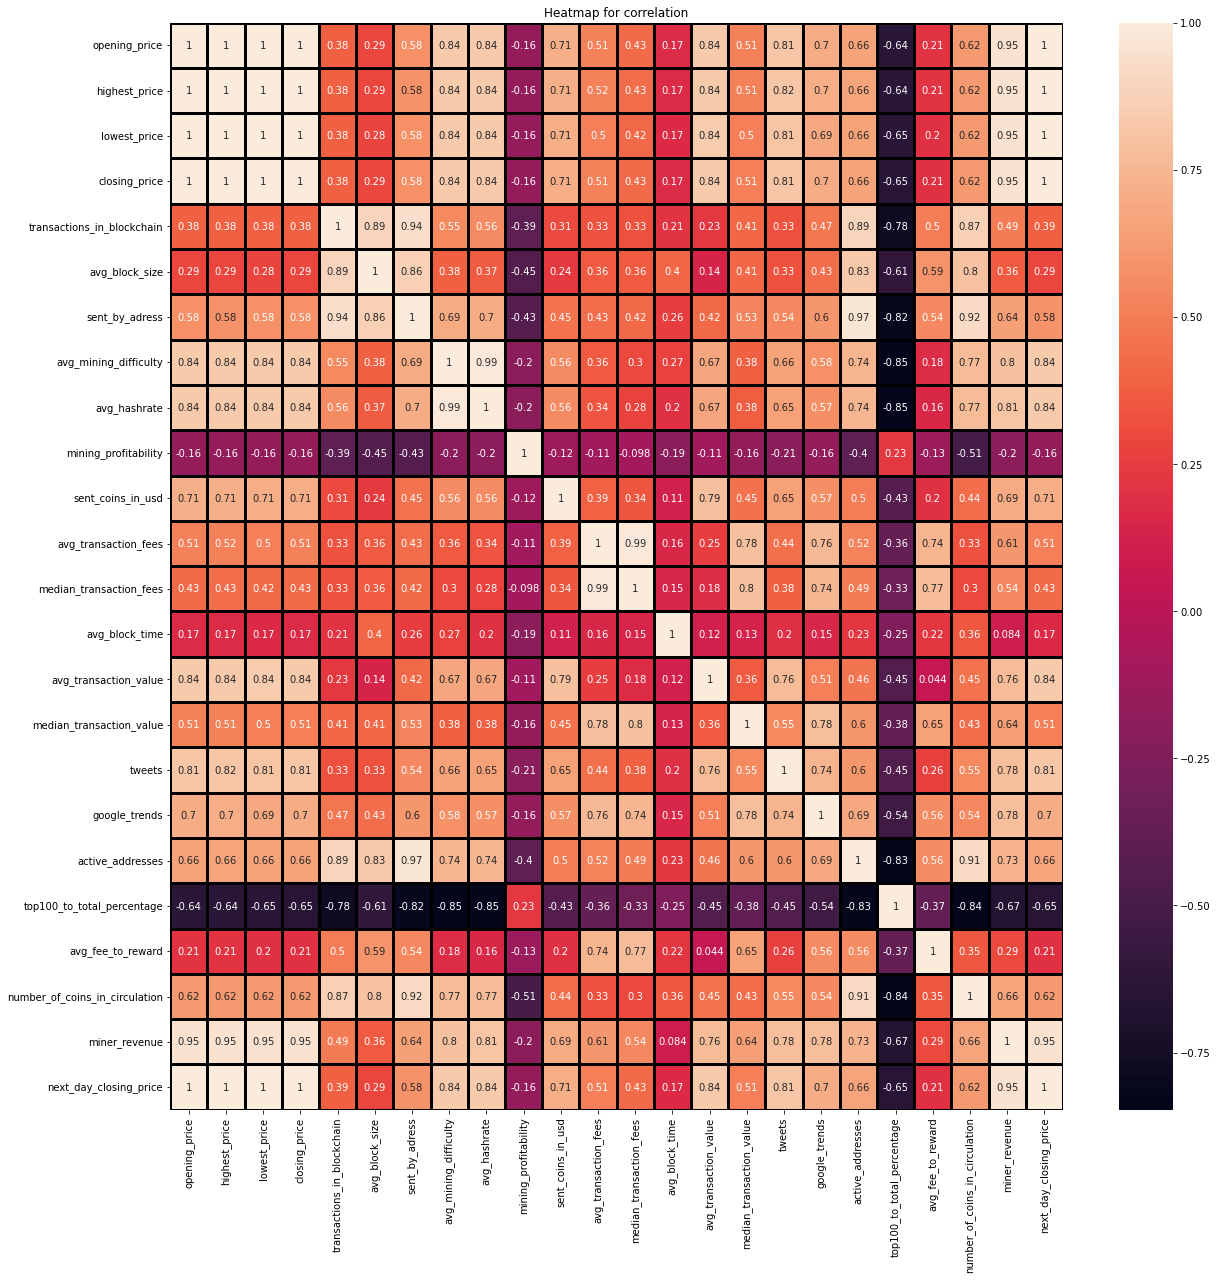

In [34]:
plt.figure(figsize=(20,20))
corrMatrix = final_df.corr()
sns.heatmap(corrMatrix, annot=True,linewidths=3, linecolor='black').set(title='Heatmap for correlation')

#### Observations 
1. The overall correlation shows that the OHLC features are strongly correlated.  
2. As the difficulty is increasing, the hash rate is also increasing, hence the high correlation. Similarly, there are more obvious variables like sent address and active address exhibiting high correlation.  
3. Miner revenues are strongly influencing the rewards. Hence, the miner revenue should be increasing as much as possible. 

### Conclusion
By performing Exploratory data analysis, we understood the correlation, distribution and many other statistical features of the data variables.